In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
laptop = pd.read_csv("final_dataset.csv")

### Exploratory Data Analysis

In [4]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564 entries, 0 to 1563
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1564 non-null   object 
 1   price             1564 non-null   int64  
 2   brand             1564 non-null   object 
 3   model             1564 non-null   object 
 4   processor         1564 non-null   float64
 5   ram memory        1564 non-null   int64  
 6   display size      1564 non-null   float64
 7   storage capacity  1564 non-null   int64  
 8   cpu cores         1564 non-null   int64  
 9   graphics card     1104 non-null   float64
 10  rating            1564 non-null   float64
 11  reviews           1564 non-null   int64  
 12  name              1564 non-null   object 
 13  url               1564 non-null   object 
 14  image             1375 non-null   object 
 15  instock           1564 non-null   object 
dtypes: float64(4), int64(5), object(7)
memory 

In [18]:
laptop.describe()
# laptop.isnull().sum()

,price,processor,ram memory,display size,storage capacity,cpu cores,graphics card,rating,reviews
count,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1104.000000,1564.000000,1564.000000
mean,123543.181586,5.475064,10.528133,14.912276,540.153453,6.565857,2326.231884,0.286957,0.230818
std,73742.517817,1.558320,5.081534,0.895630,269.053509,2.955440,924.762656,1.109482,2.194286
min,25500.000000,2.000000,4.000000,10.500000,64.000000,1.000000,0.000000,0.000000,0.000000
25%,73999.000000,5.000000,8.000000,14.000000,256.000000,4.000000,1650.000000,0.000000,0.000000
50%,104994.500000,5.000000,8.000000,15.600000,512.000000,6.000000,2800.000000,0.000000,0.000000
75%,150000.000000,7.000000,16.000000,15.600000,512.000000,8.000000,3050.000000,0.000000,0.000000
max,555555.000000,9.000000,32.000000,17.300000,2048.000000,24.000000,4070.000000,5.000000,73.000000


In [6]:
# Specify specific columns for which you want to print value counts
columns_to_check = [ 'brand', 'model', 'price', 'storage capacity', 'ram memory', 'display size', 'cpu cores'] 

# Iterate through specified columns and print value counts
for column in columns_to_check:
    print("Column:", column)
    print(laptop[column].nunique())
    print()

Column: brand
22

Column: model
557

Column: price
656

Column: storage capacity
6

Column: ram memory
7

Column: display size
16

Column: cpu cores
12



### Basic Visualization

In [7]:
cols = list(laptop.columns)

# Remove the specified columns
excluded_cols = ['id', 'brand', 'model', 'rating', 'reviews', 'name', 'url', 'image', 'instock']
cols = [col for col in cols if col not in excluded_cols]

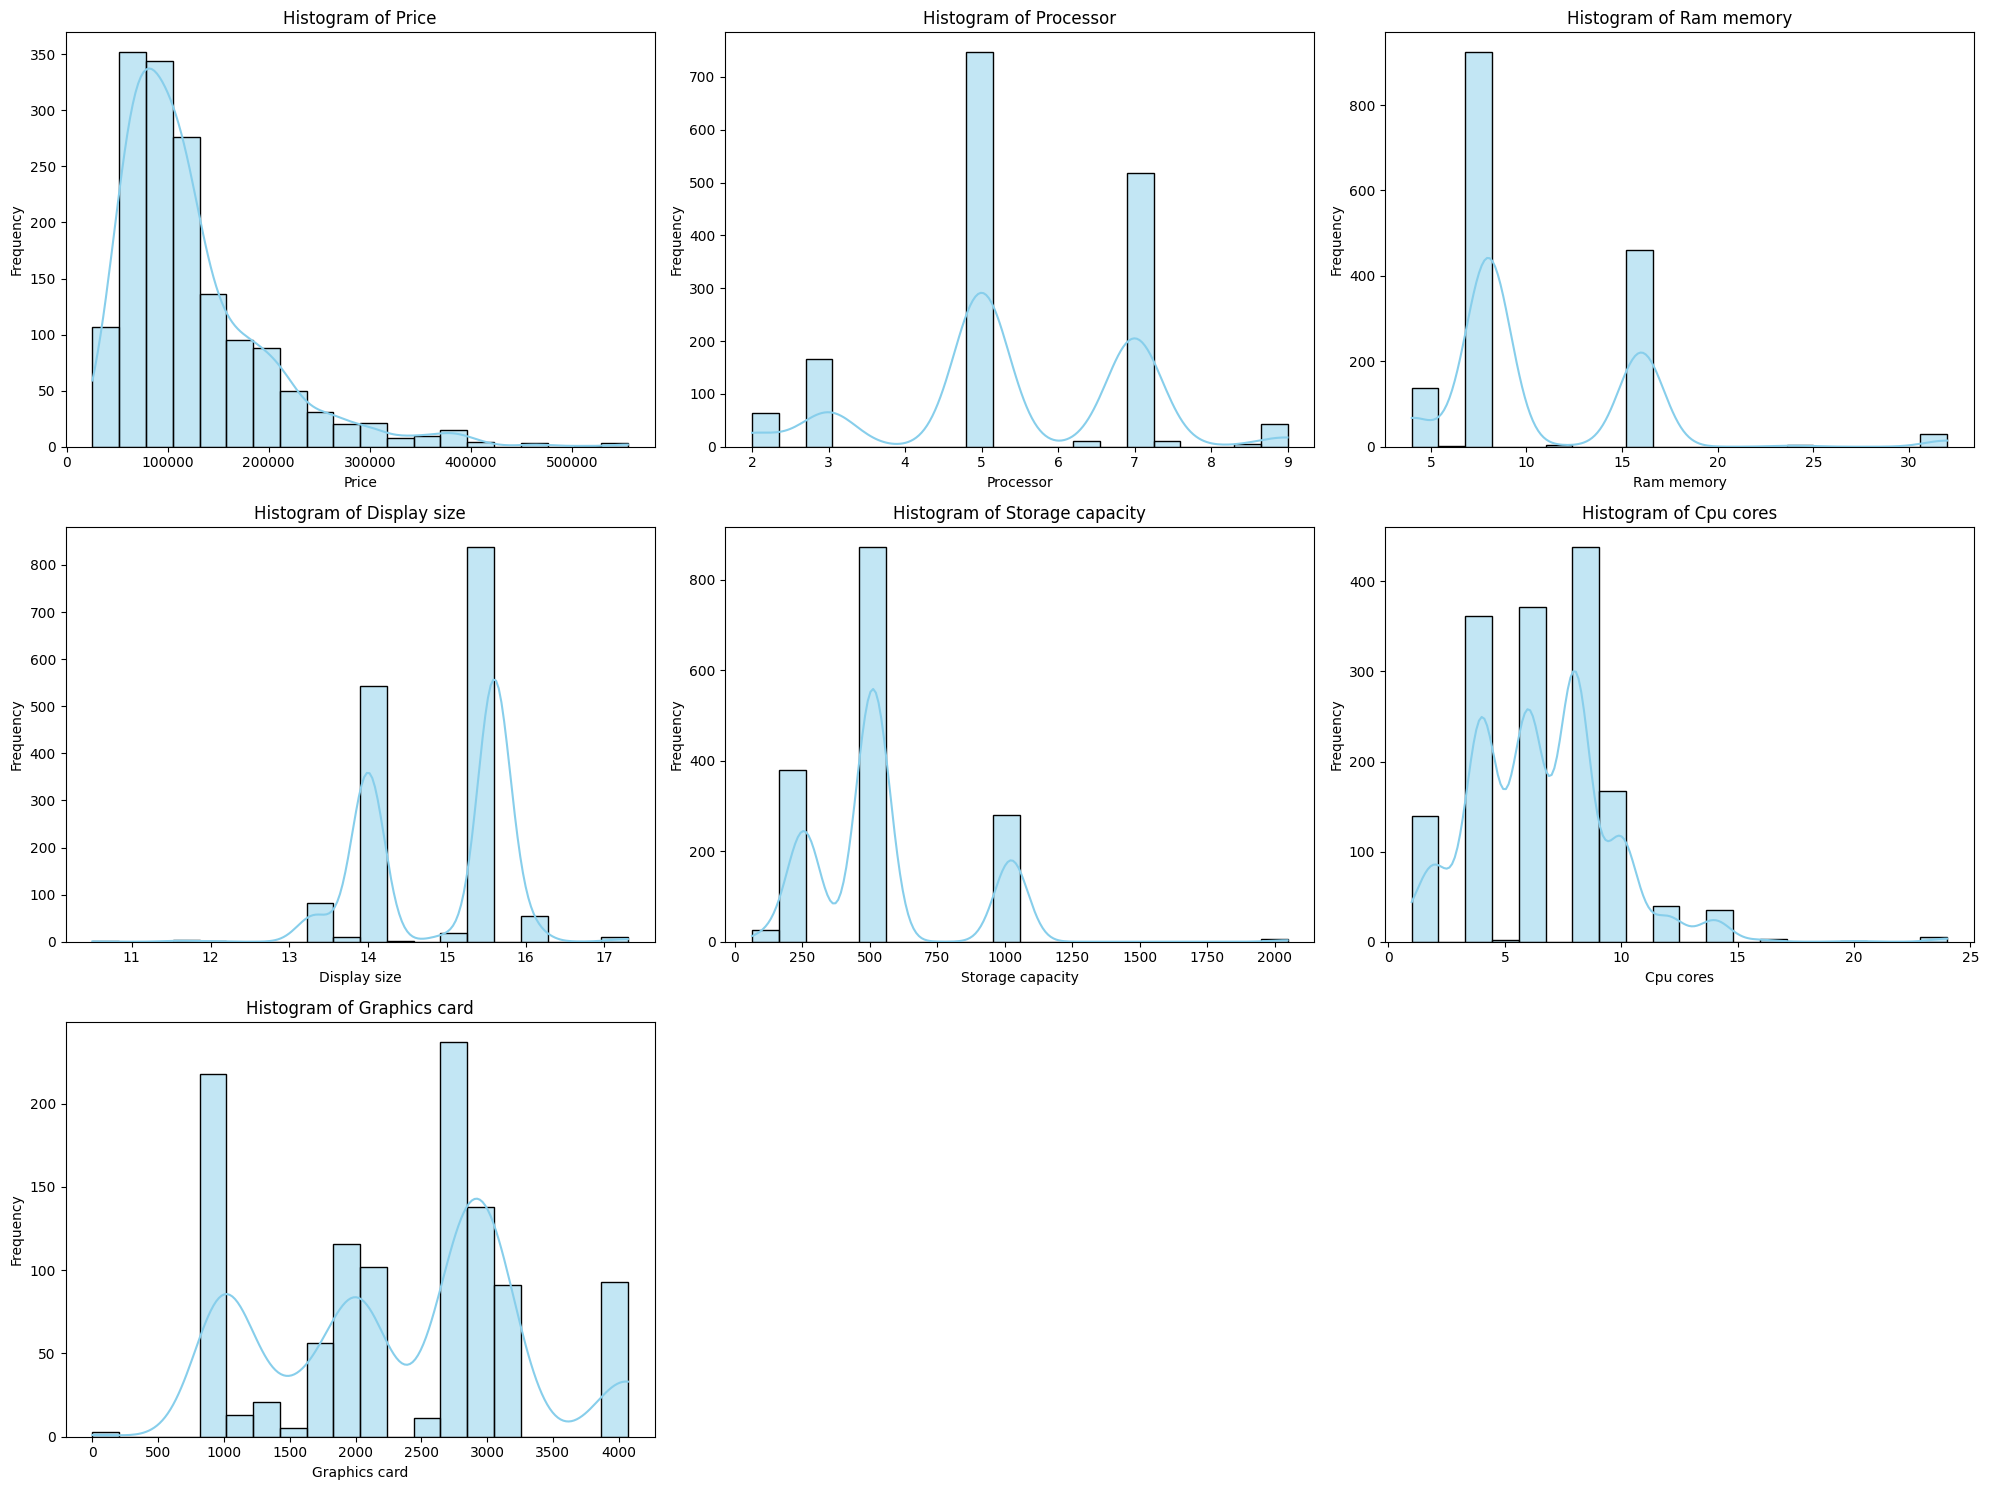

In [8]:
# Number of columns per row
cols_per_row = 3

# Number of rows needed
num_rows = int(np.ceil(len(cols) / cols_per_row))

# Create subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(20, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column and create a histogram
for i, col in enumerate(cols):
    sns.histplot(data=laptop, x=col, bins=20, color='skyblue', kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col.capitalize()}')
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

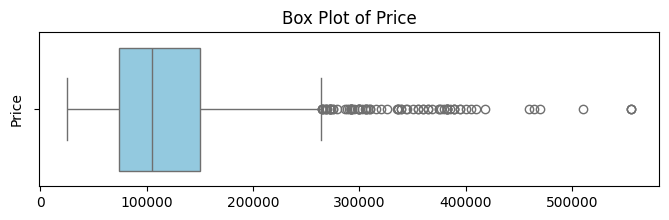

Column: price
price
85000     23
120000    22
105000    20
125000    17
110000    16
          ..
214999     1
68500      1
139318     1
53999      1
96990      1
Name: count, Length: 656, dtype: int64



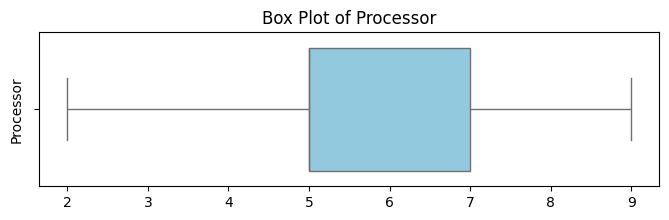

Column: processor
processor
5.0    747
7.0    518
3.0    166
2.0     64
9.0     43
6.5     11
7.5     10
8.5      5
Name: count, dtype: int64



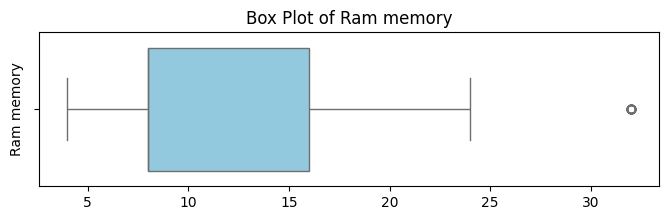

Column: ram memory
ram memory
8     924
16    461
4     138
32     30
12      5
24      5
6       1
Name: count, dtype: int64



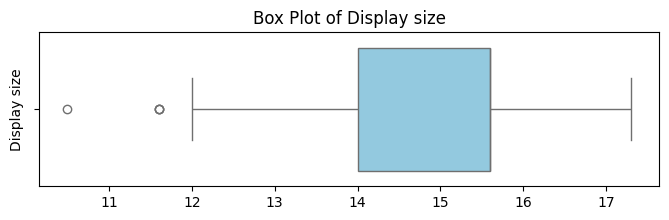

Column: display size
display size
15.6    838
14.0    533
13.3     77
16.0     45
15.0     19
13.6     11
14.1     11
17.3      8
16.1      8
13.5      5
11.6      3
14.5      2
16.2      1
10.5      1
12.0      1
17.0      1
Name: count, dtype: int64



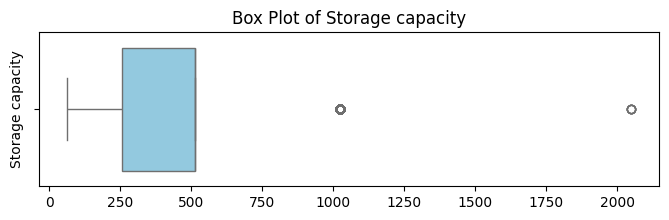

Column: storage capacity
storage capacity
512     872
256     379
1024    281
128      25
2048      5
64        2
Name: count, dtype: int64



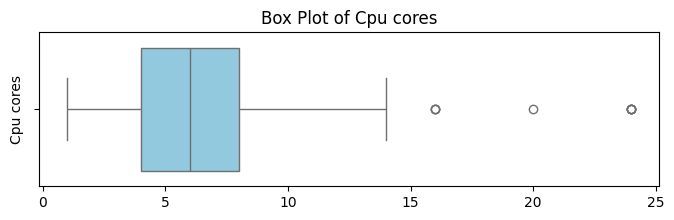

Column: cpu cores
cpu cores
8     438
6     371
4     362
10    167
2     113
12     40
14     35
1      27
24      5
16      3
5       2
20      1
Name: count, dtype: int64



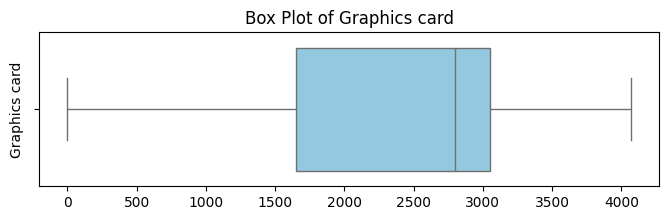

Column: graphics card
graphics card
2800.0    237
1000.0    218
3050.0    134
2000.0    116
2050.0     87
3060.0     69
4050.0     48
1650.0     44
4060.0     35
3070.0     22
1300.0     15
1050.0     13
1660.0     12
2500.0     11
4070.0     10
2070.0      8
1400.0      6
2060.0      6
1500.0      5
2900.0      4
0.0         3
2040.0      1
Name: count, dtype: int64



In [9]:
# Loop through each column and create a box plot
for col in cols:
    plt.figure(figsize=(8, 2))
    sns.boxplot(data=laptop, x=col, color='skyblue')
    plt.title(f'Box Plot of {col.capitalize()}')
    plt.xlabel('')  # No need for x label as it's a single variable plot
    plt.ylabel(col.capitalize())
    plt.show()
    print("Column:", col)
    print(laptop[col].value_counts())
    print()


### Bivariate Visualization

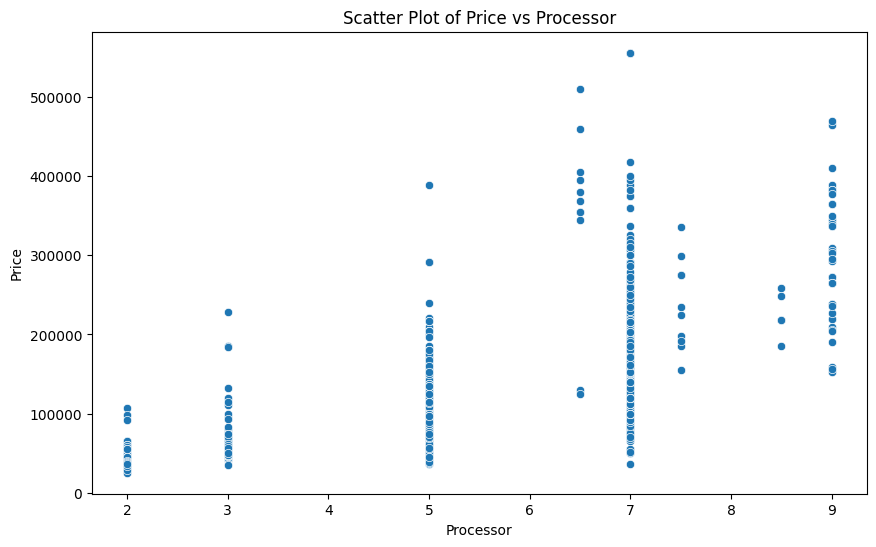

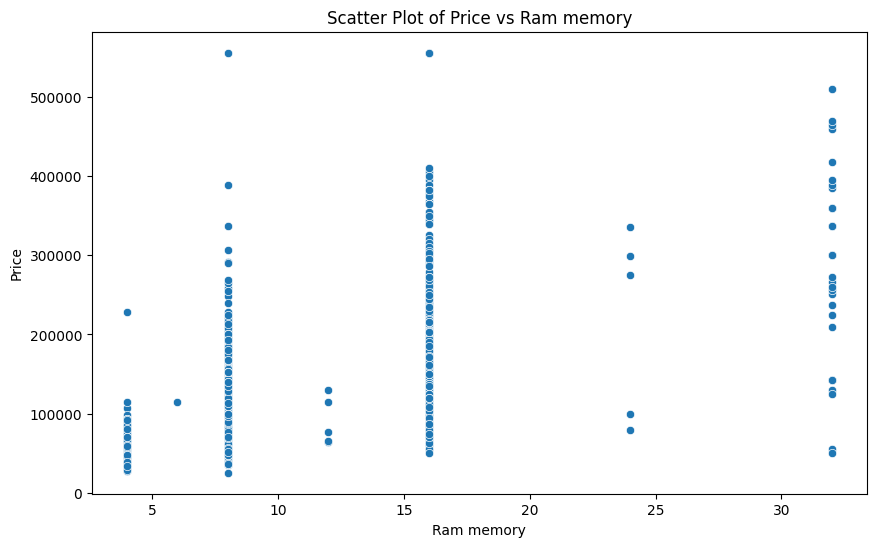

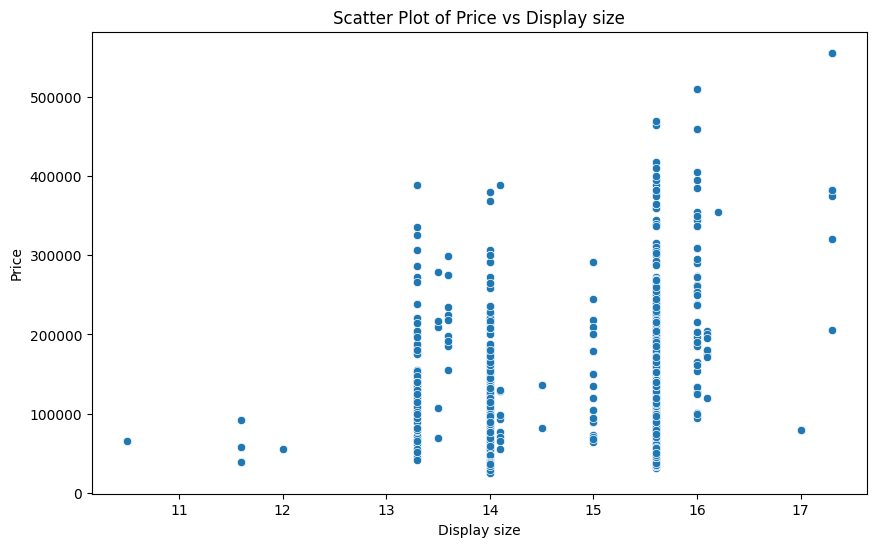

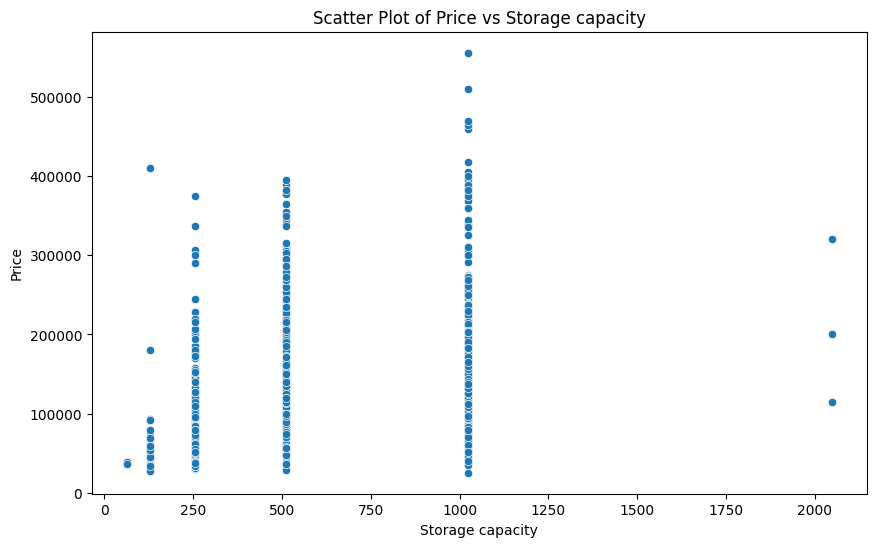

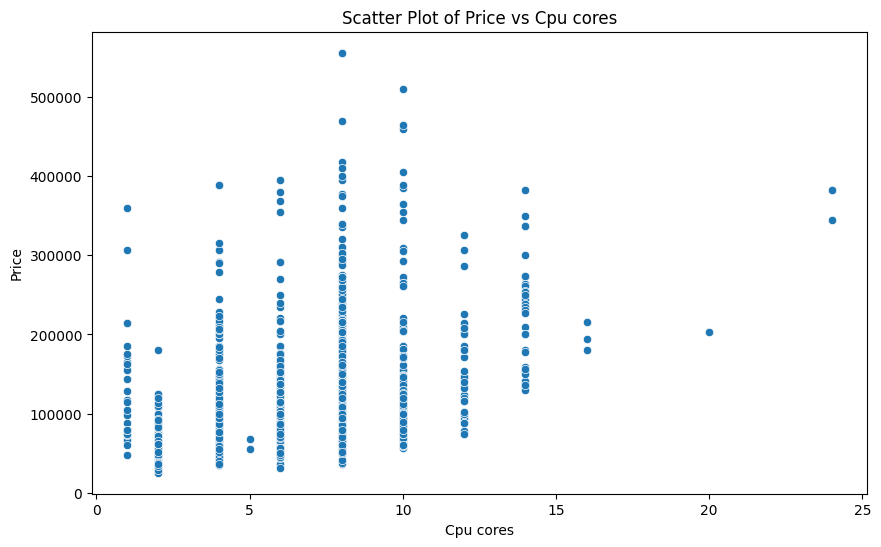

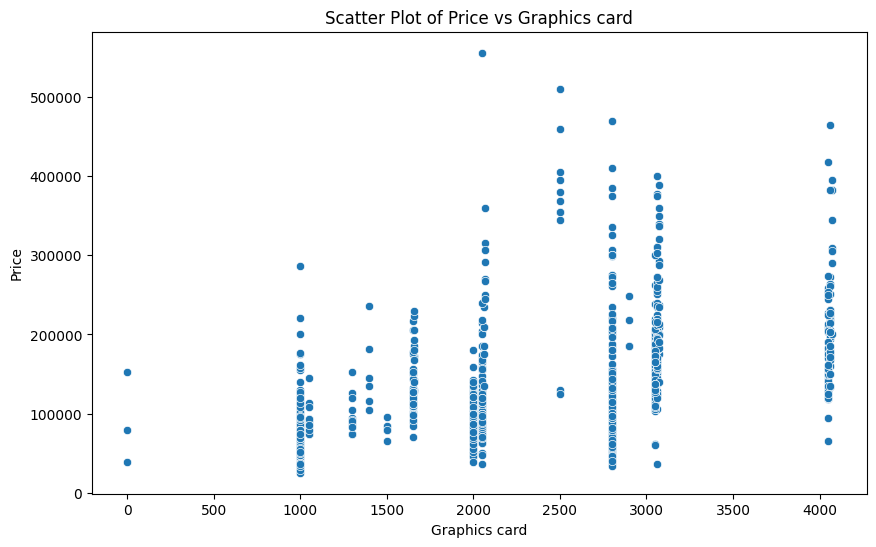

In [12]:
# List of columns to plot against 'price'
cols_to_plot = ['processor', 'ram memory', 'display size', 'storage capacity', 'cpu cores', 'graphics card']

# Loop through each column and create a scatter plot with 'price'
for col in cols_to_plot:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=laptop, x=col, y='price')
    plt.title(f'Scatter Plot of Price vs {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Price')
    plt.show()

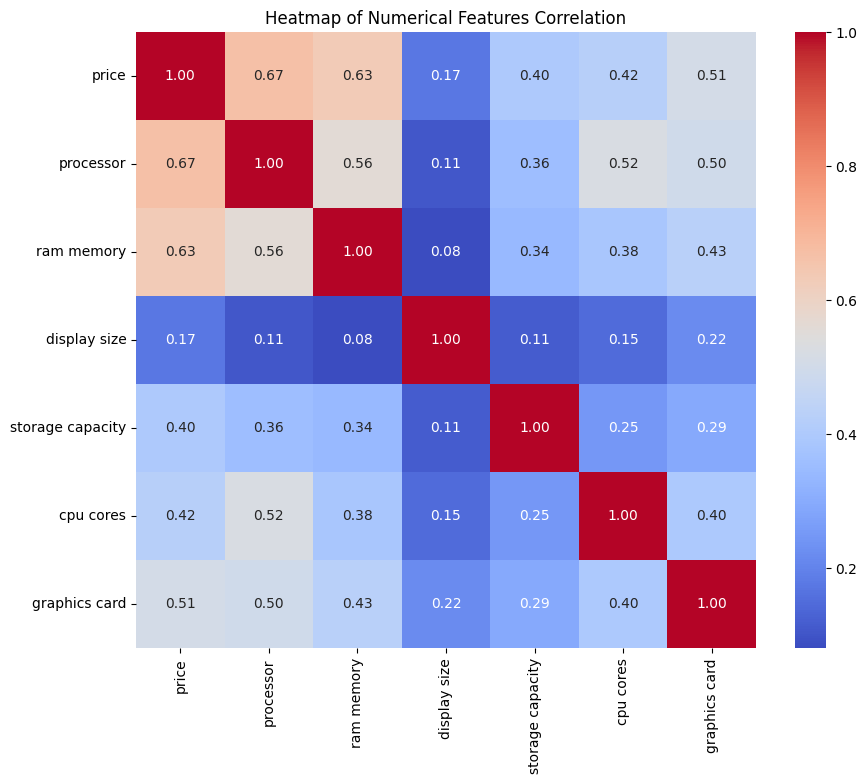

In [13]:
# Heatmap
# Create a DataFrame with only the numerical columns
numerical_data = laptop[cols]

# Calculate the correlation matrix
corr_matrix = numerical_data.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Features Correlation')
plt.show()

### 1. What does each brand offer?


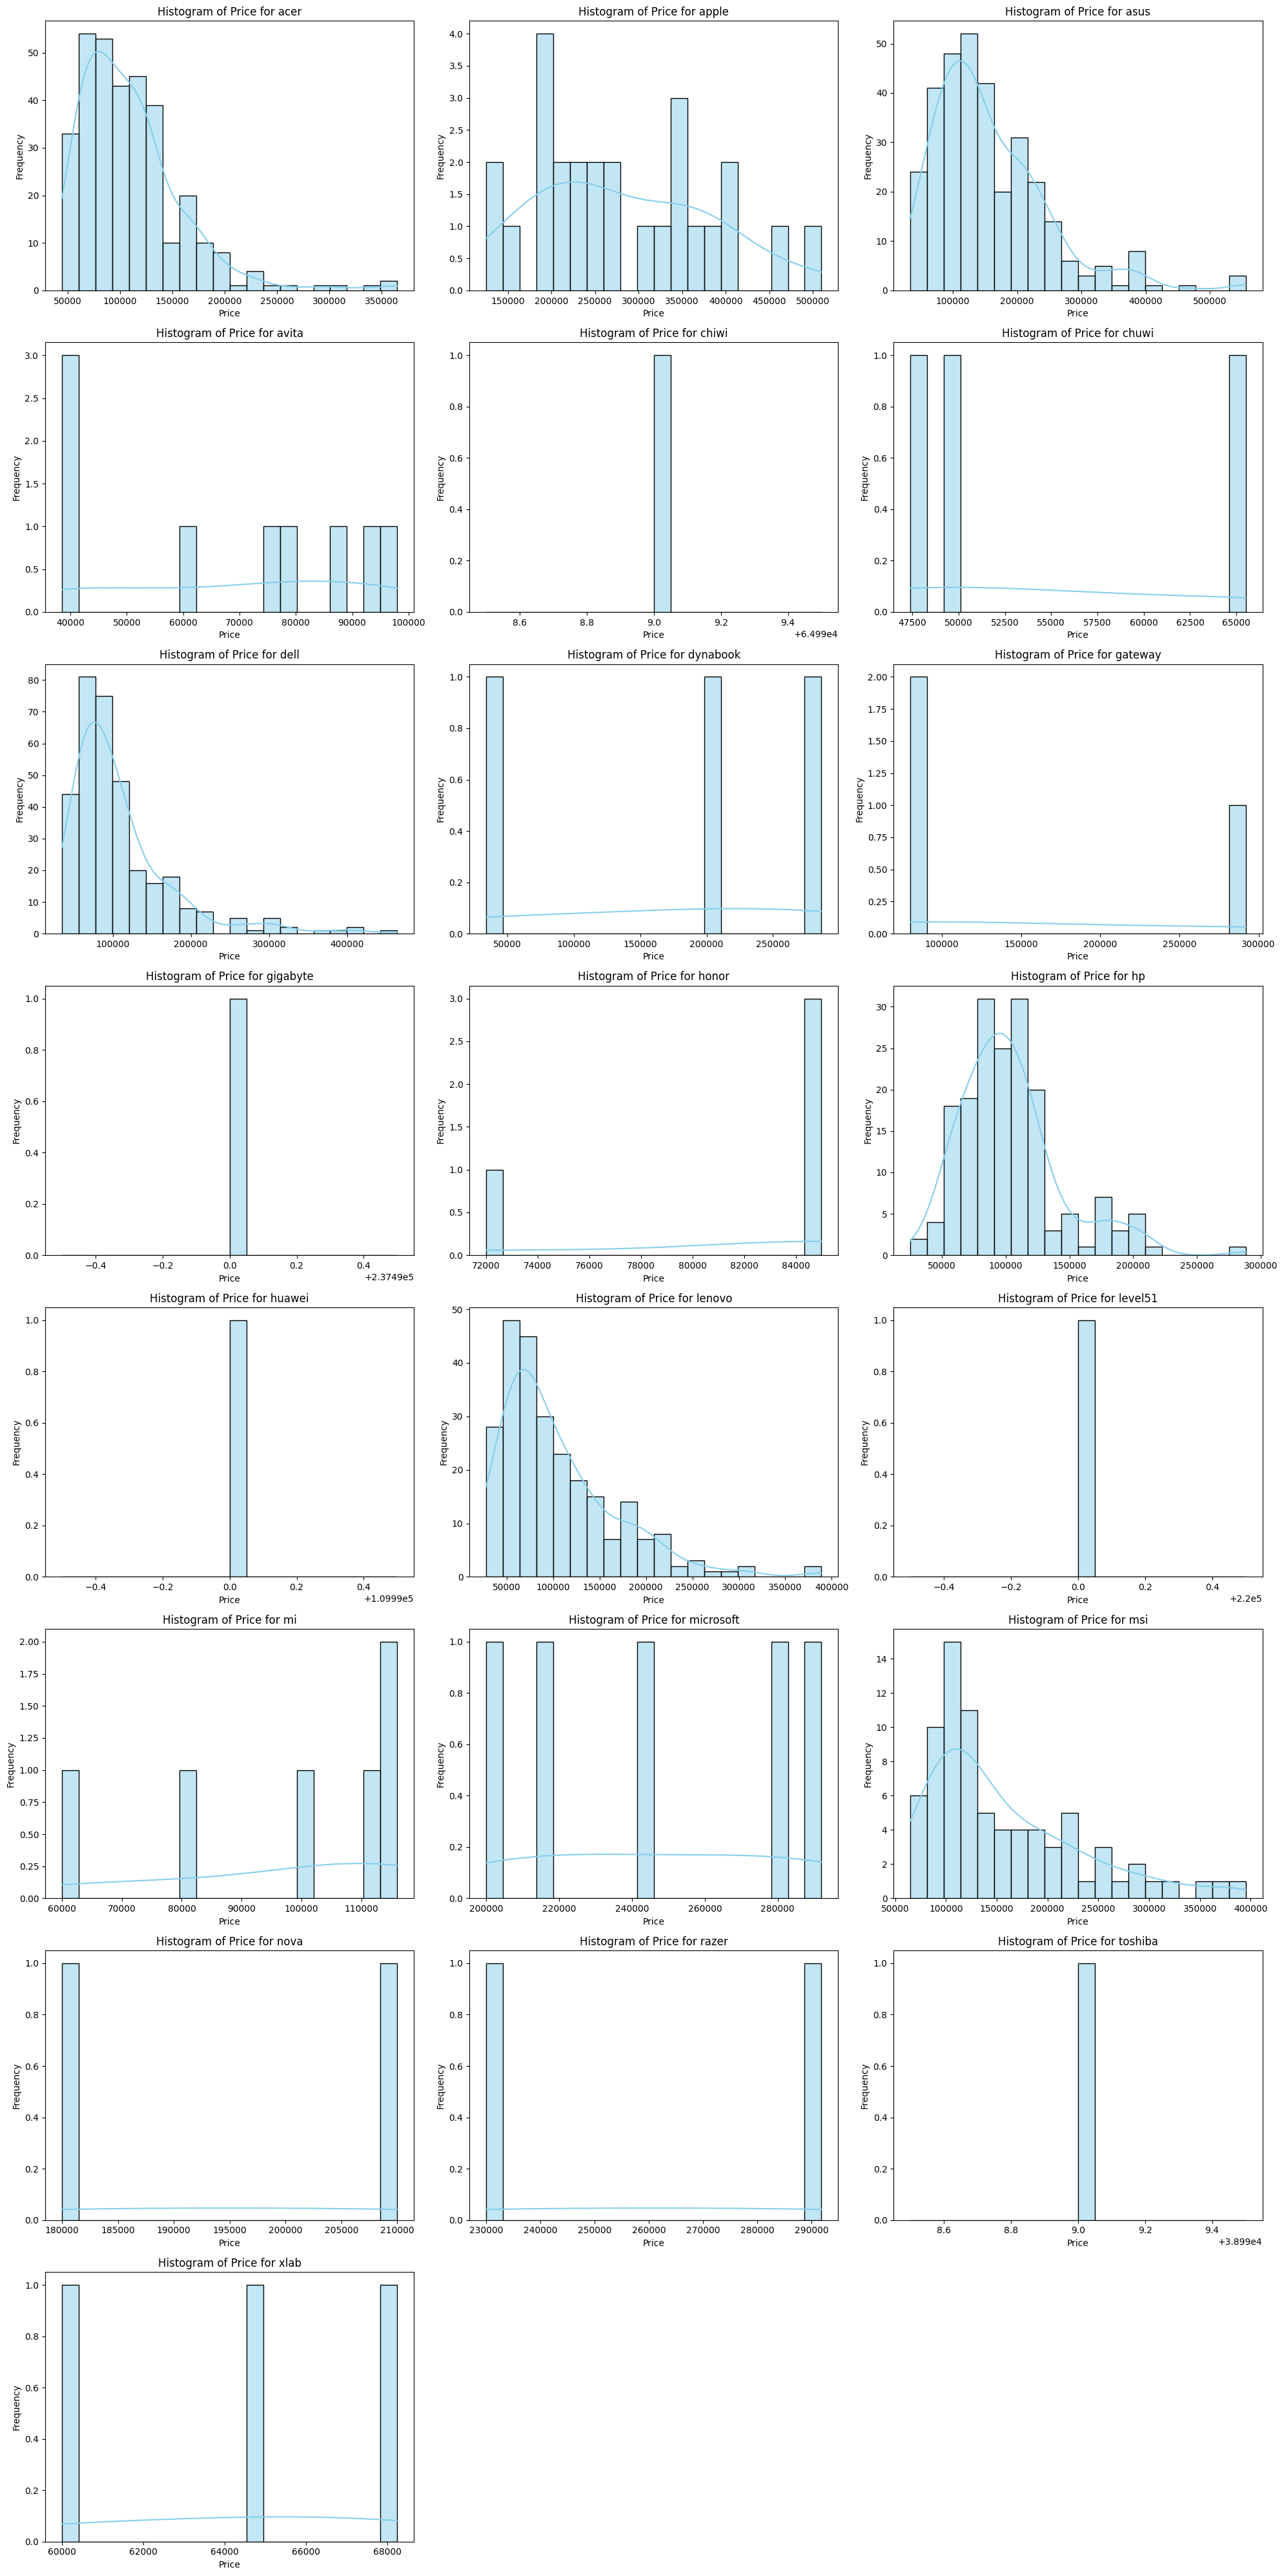

In [17]:
# Group by the 'brand' column
grouped = laptop.groupby('brand')

# Number of brands
num_brands = len(grouped)

# Number of columns per row
cols_per_row = 3

# Number of rows needed
num_rows = int(np.ceil(num_brands / cols_per_row))

# Create subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(20, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each brand group and create a histogram for the 'price' column
for i, (brand, group) in enumerate(grouped):
    sns.histplot(data=group, x='price', bins=20, color='skyblue', kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of Price for {brand}')
    axes[i].set_xlabel('Price')
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

### 2. What can we afford for every budget range?

In [22]:
# Define the price ranges
price_bins = [25000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 555555]
price_labels = ['25k-100k', '100k-150k', '150k-200k', '200k-250k', '250k-300k', '300k-350k', '350k-400k', '400k-450k', '450k-500k', '500k-555k']

# Create a new column for the price categories
laptop['price_range'] = pd.cut(laptop['price'], bins=price_bins, labels=price_labels, right=False)

# Print the number of rows for each price range category
for label in price_labels:
    count = laptop[laptop['price_range'] == label].shape[0]
    print(f'Number of rows for price range {label}: {count}')

Number of rows for price range 25k-100k: 751
Number of rows for price range 100k-150k: 418
Number of rows for price range 150k-200k: 185
Number of rows for price range 200k-250k: 105
Number of rows for price range 250k-300k: 52
Number of rows for price range 300k-350k: 19
Number of rows for price range 350k-400k: 24
Number of rows for price range 400k-450k: 3
Number of rows for price range 450k-500k: 3
Number of rows for price range 500k-555k: 2


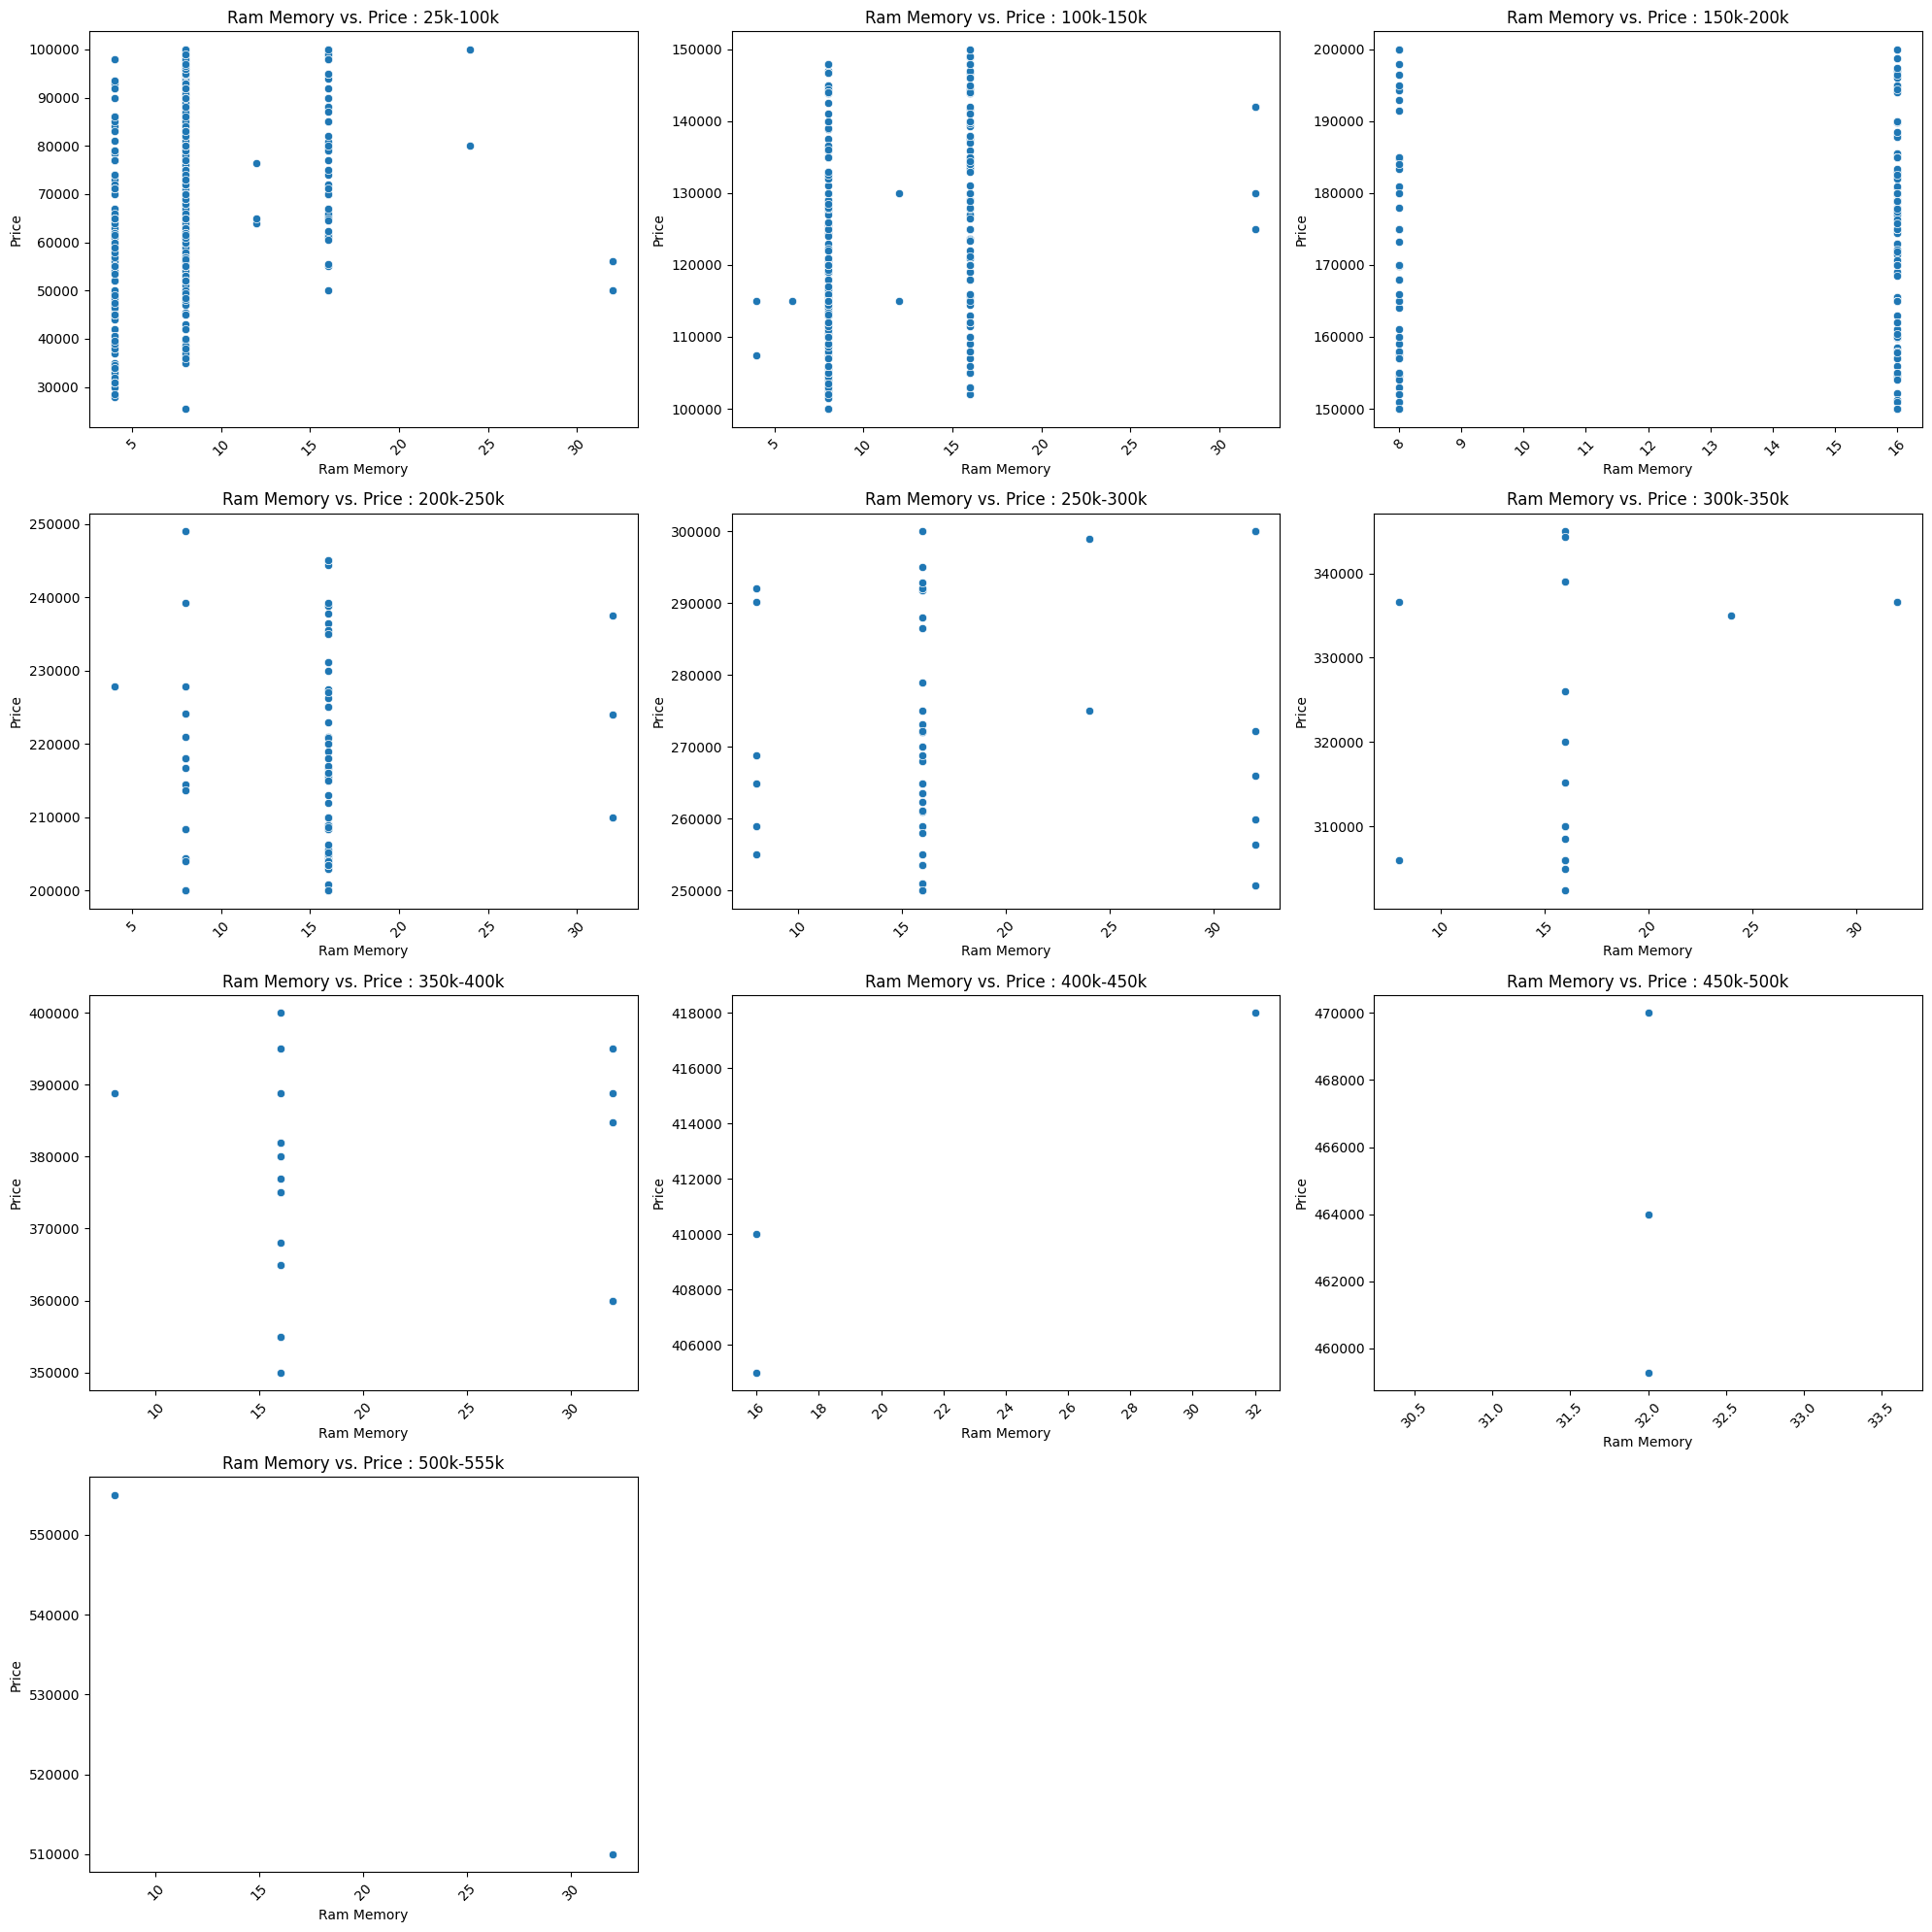

In [34]:
# Number of price categories
num_price_ranges = len(price_labels)

# Number of columns per row
cols_per_row = 3

# Number of rows needed
num_rows = int(np.ceil(num_price_ranges / cols_per_row))

# Create subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(20, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot scatter plots for each price range category
for i, label in enumerate(price_labels):
    subset = laptop[laptop['price_range'] == label]
    if not subset.empty:
        sns.scatterplot(data=subset, x='ram memory', y='price', ax=axes[i])
        axes[i].set_title(f'Ram Memory vs. Price : {label}')
        axes[i].set_xlabel('Ram Memory')
        axes[i].set_ylabel('Price')
        axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    else:
        fig.delaxes(axes[i])

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

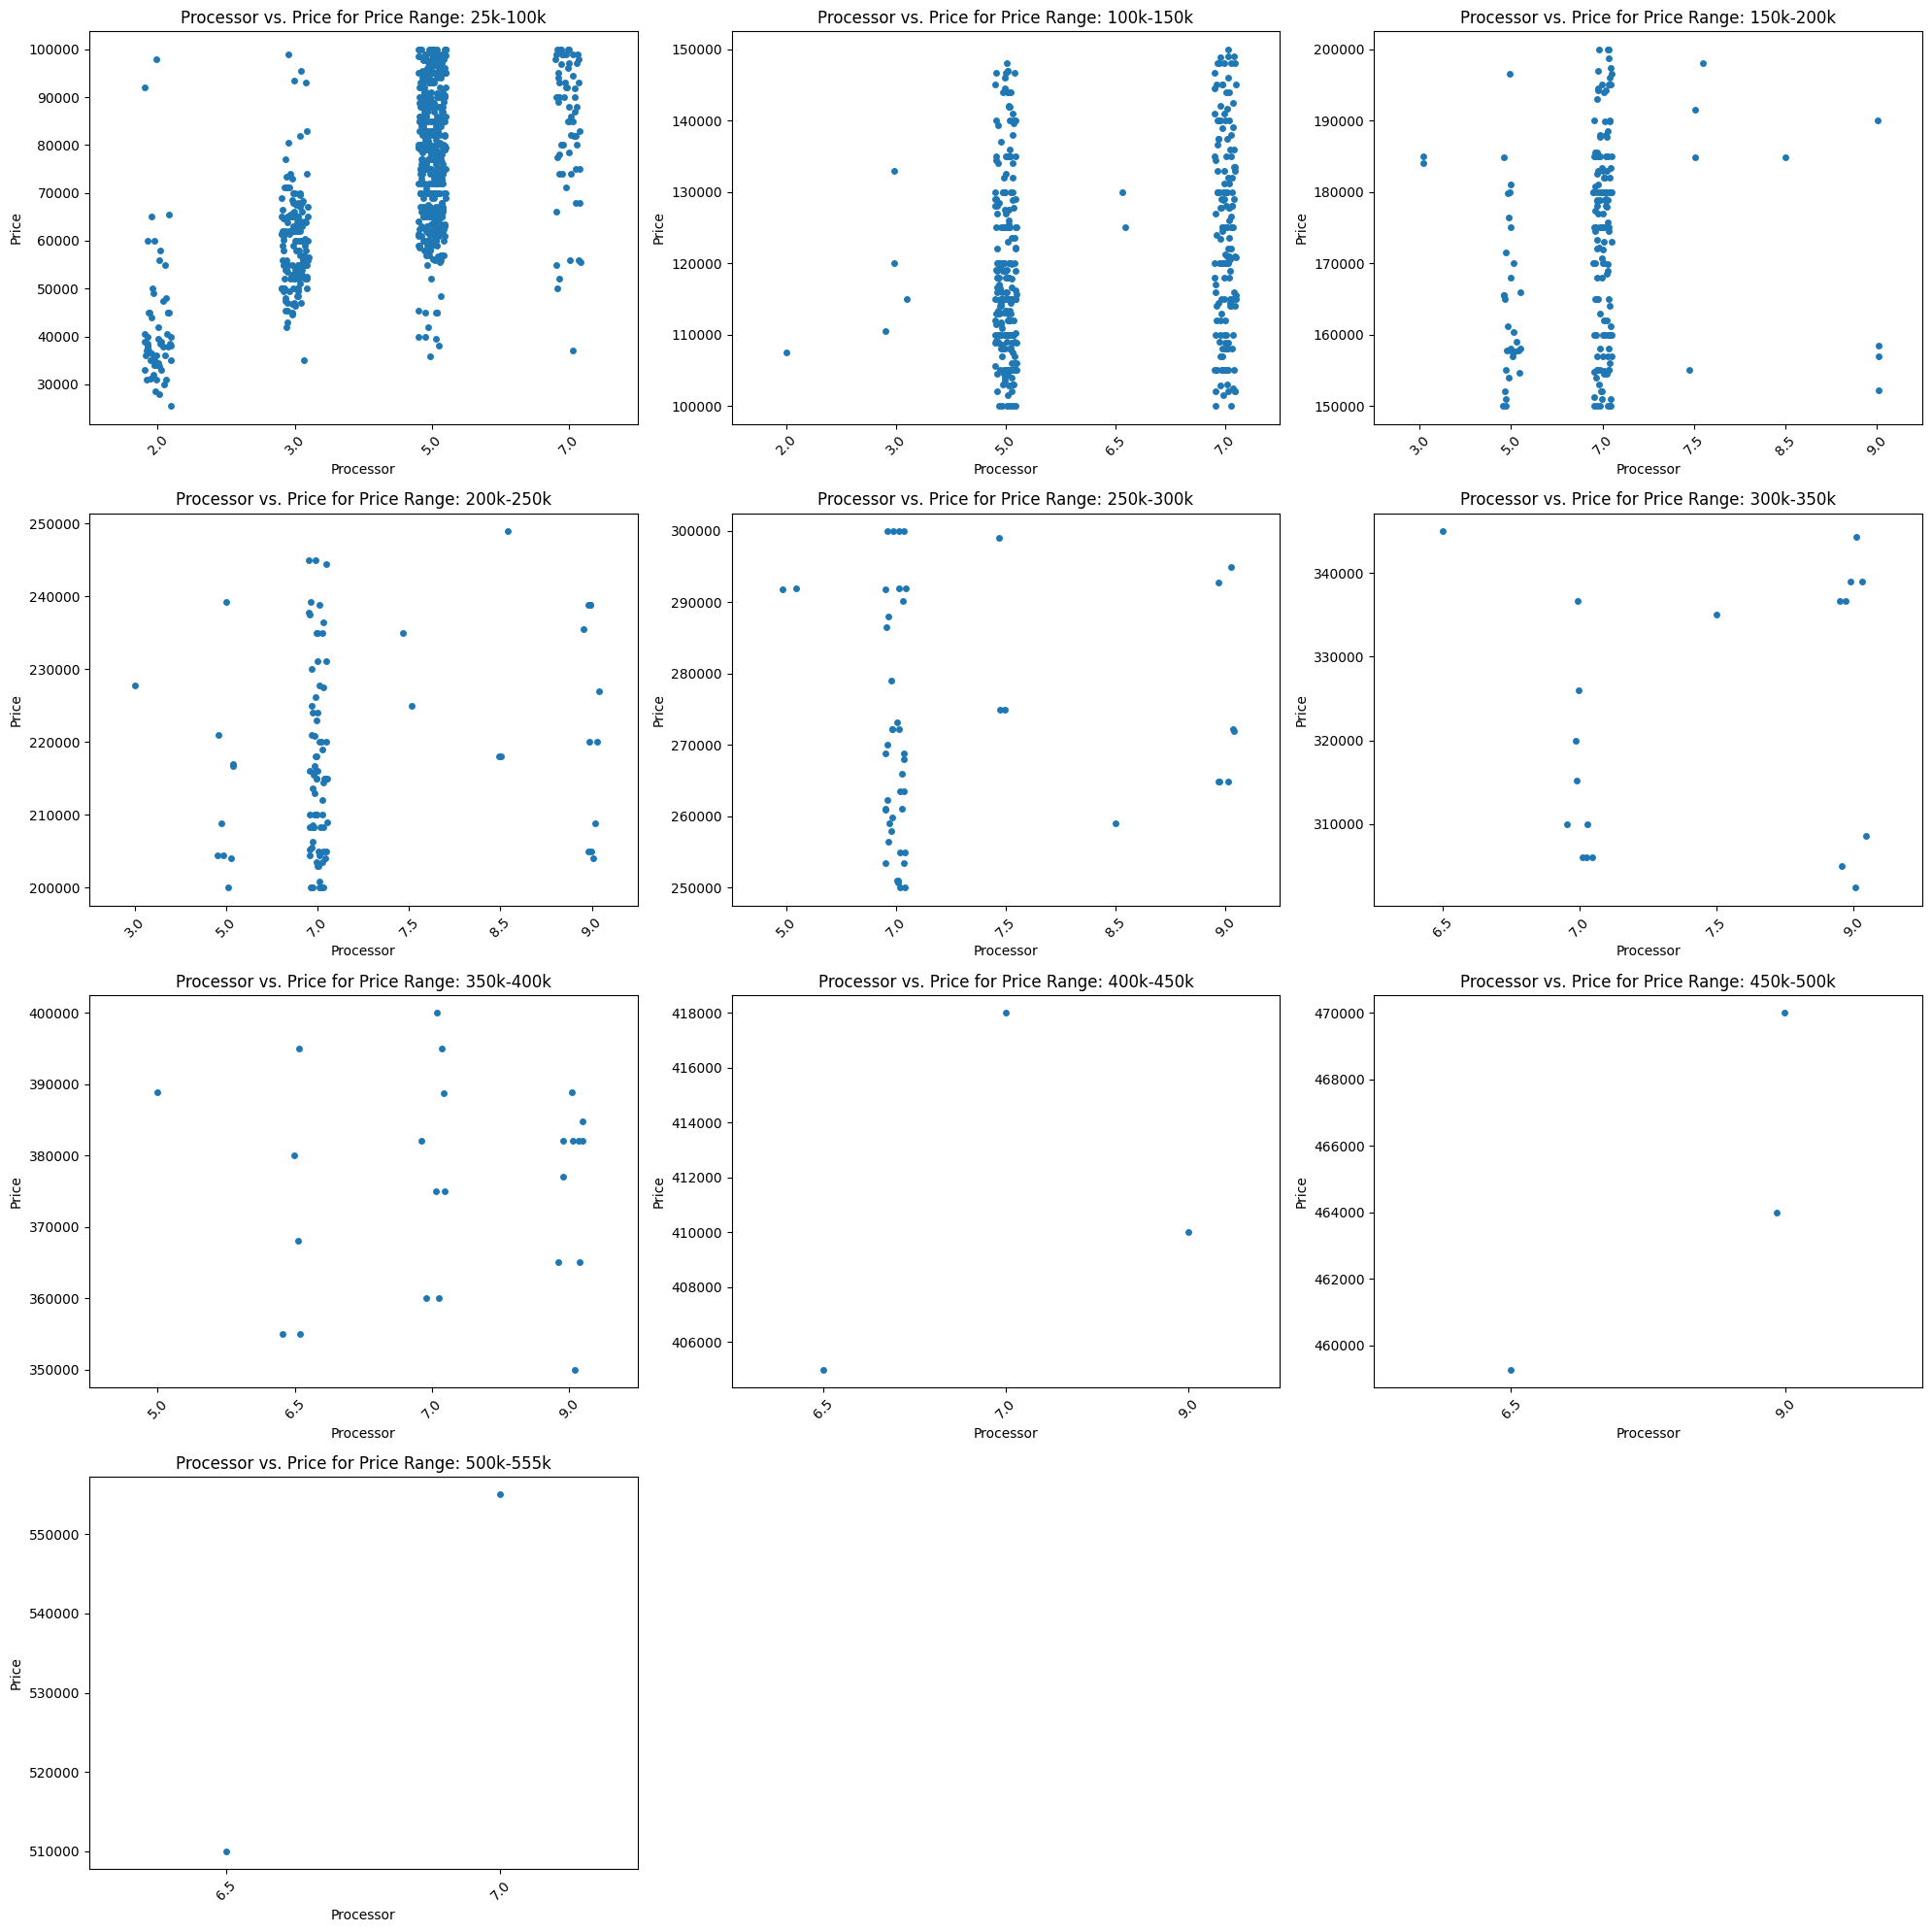

In [33]:
# Number of columns per row
cols_per_row = 3

# Number of rows needed
num_rows = int(np.ceil(num_price_ranges / cols_per_row))

# Create subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(20, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot scatter plots for each price range category
for i, label in enumerate(price_labels):
    subset = laptop[laptop['price_range'] == label]
    if not subset.empty:
        sns.stripplot(data=subset, x='processor', y='price', ax=axes[i])
        axes[i].set_title(f'Processor vs. Price for Price Range: {label}')
        axes[i].set_xlabel('Processor')
        axes[i].set_ylabel('Price')
        axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    else:
        fig.delaxes(axes[i])

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

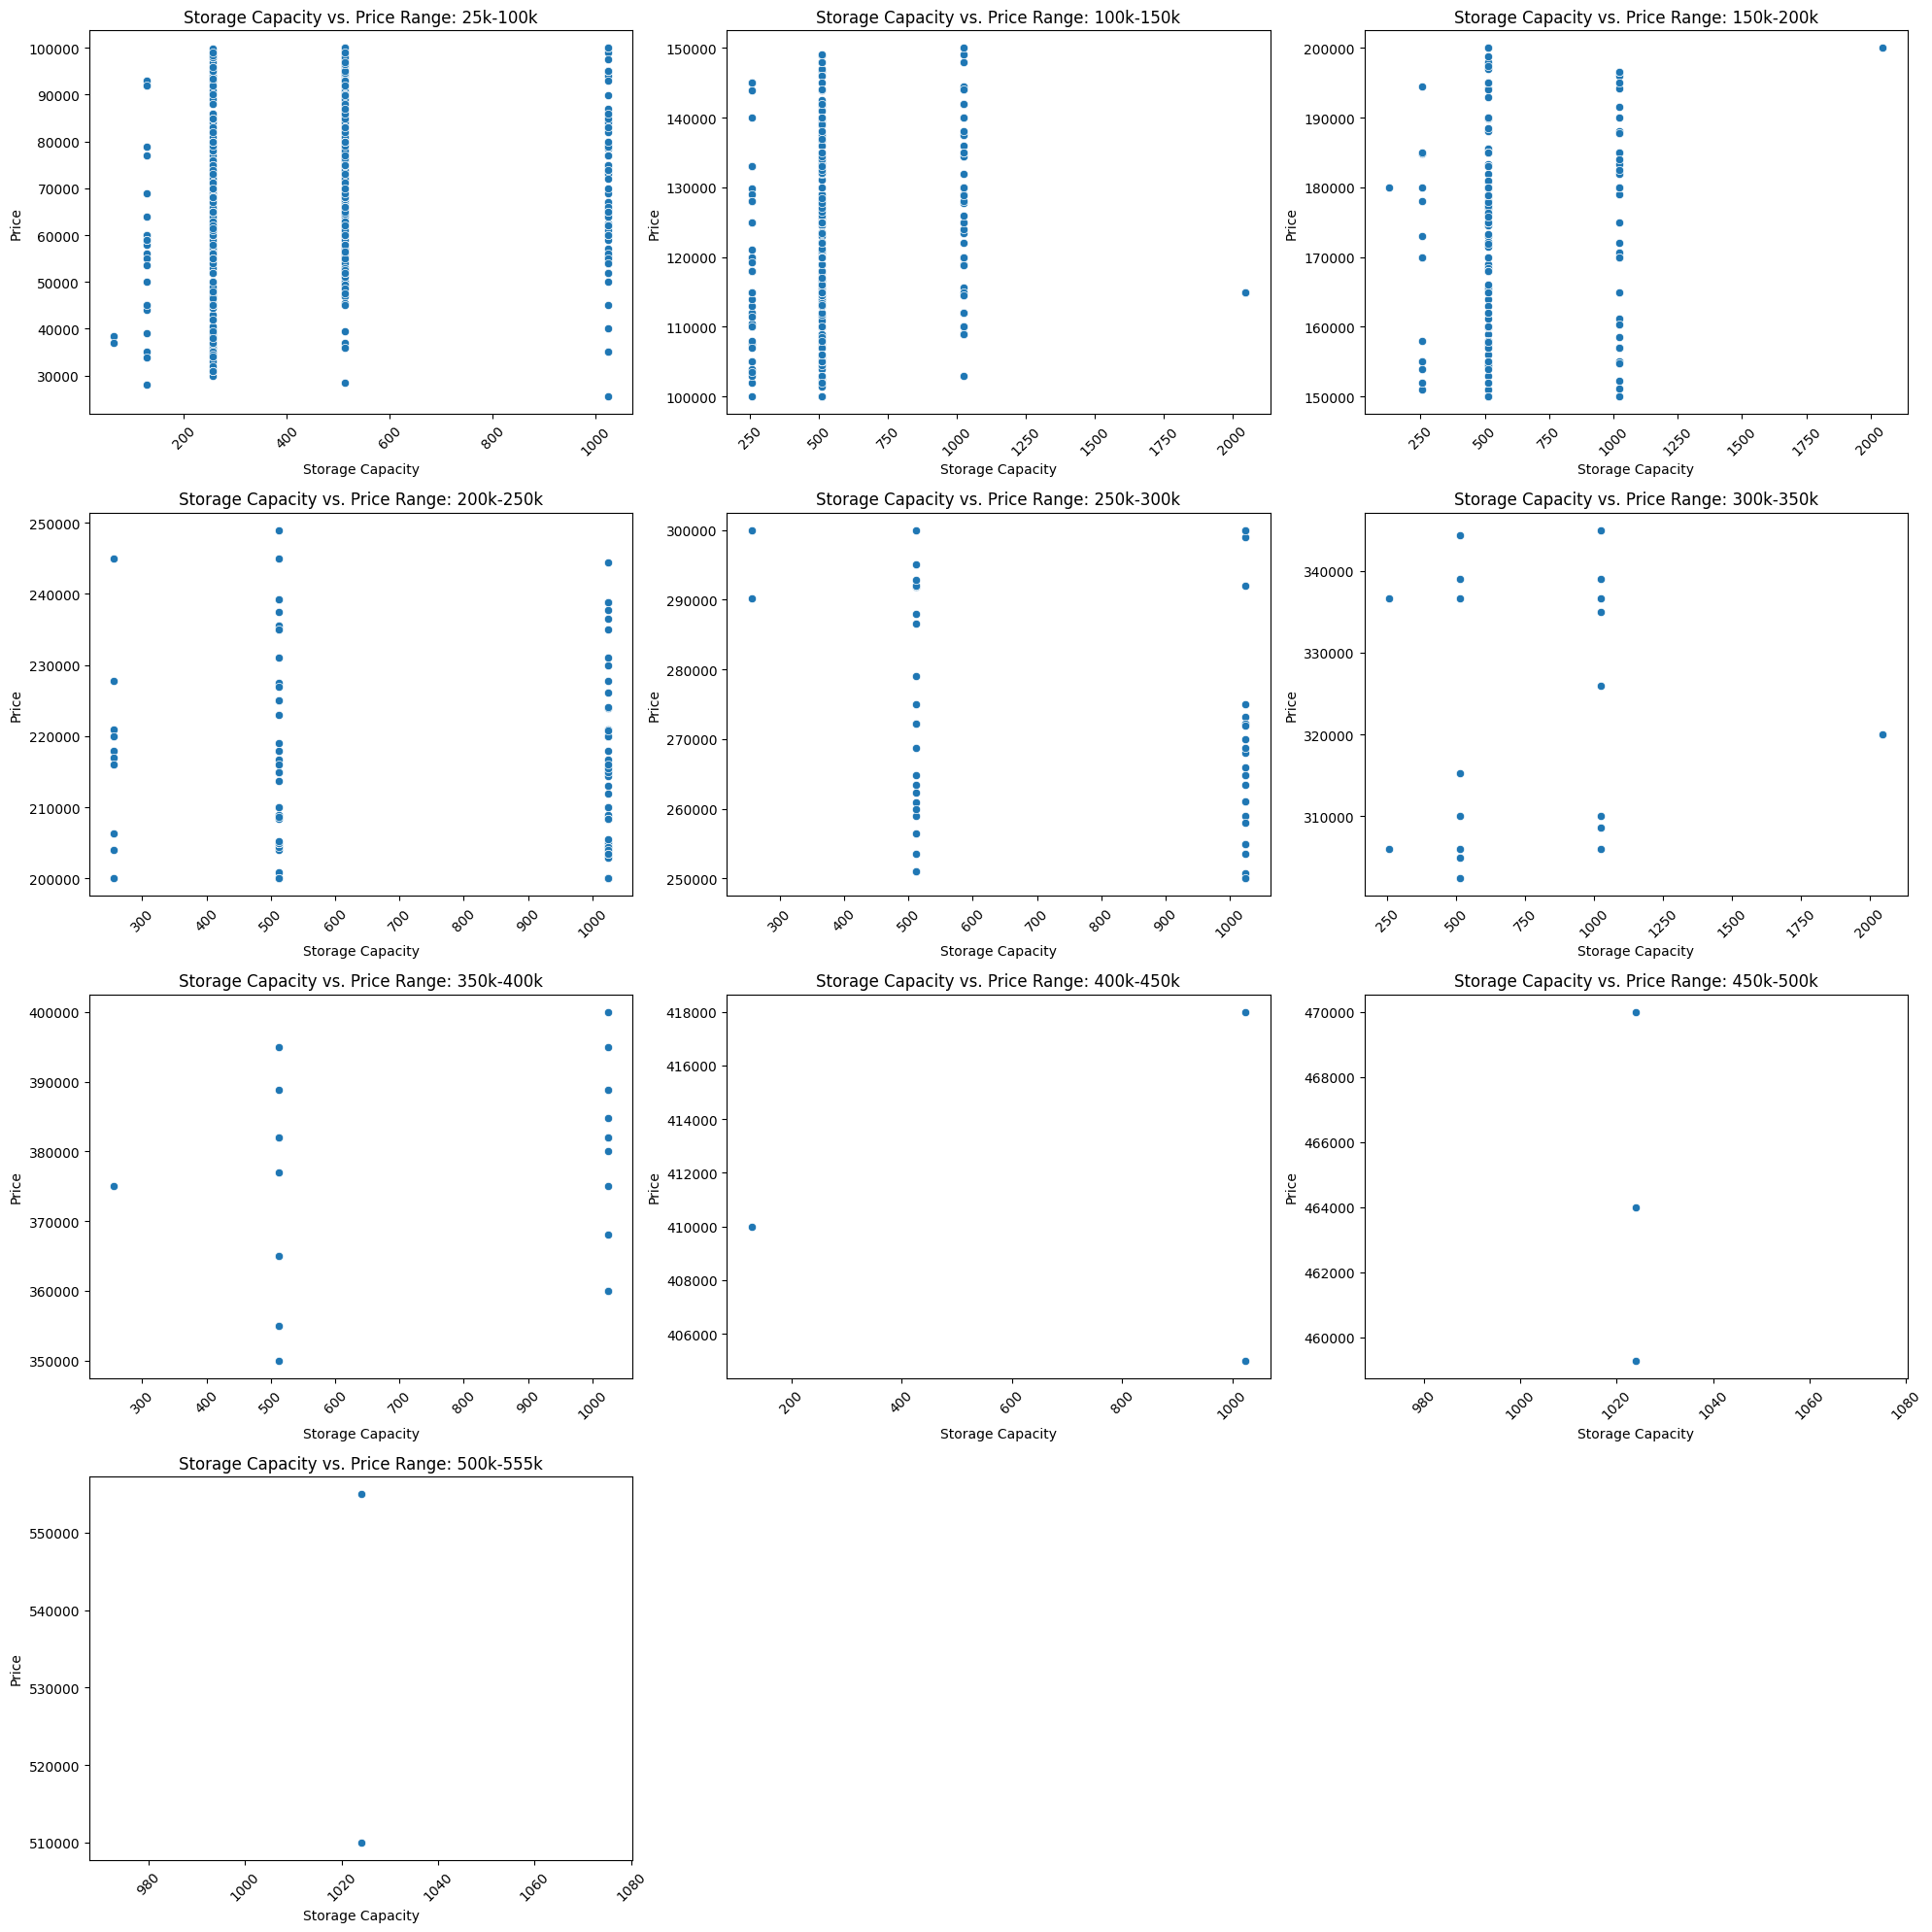

In [36]:
# Number of columns per row
cols_per_row = 3

# Number of rows needed
num_rows = int(np.ceil(num_price_ranges / cols_per_row))

# Create subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(20, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot scatter plots for each price range category
for i, label in enumerate(price_labels):
    subset = laptop[laptop['price_range'] == label]
    if not subset.empty:
        sns.scatterplot(data=subset, x='storage capacity', y='price', ax=axes[i])
        axes[i].set_title(f'Storage Capacity vs. Price Range: {label}')
        axes[i].set_xlabel('Storage Capacity')
        axes[i].set_ylabel('Price')
        axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    else:
        fig.delaxes(axes[i])

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

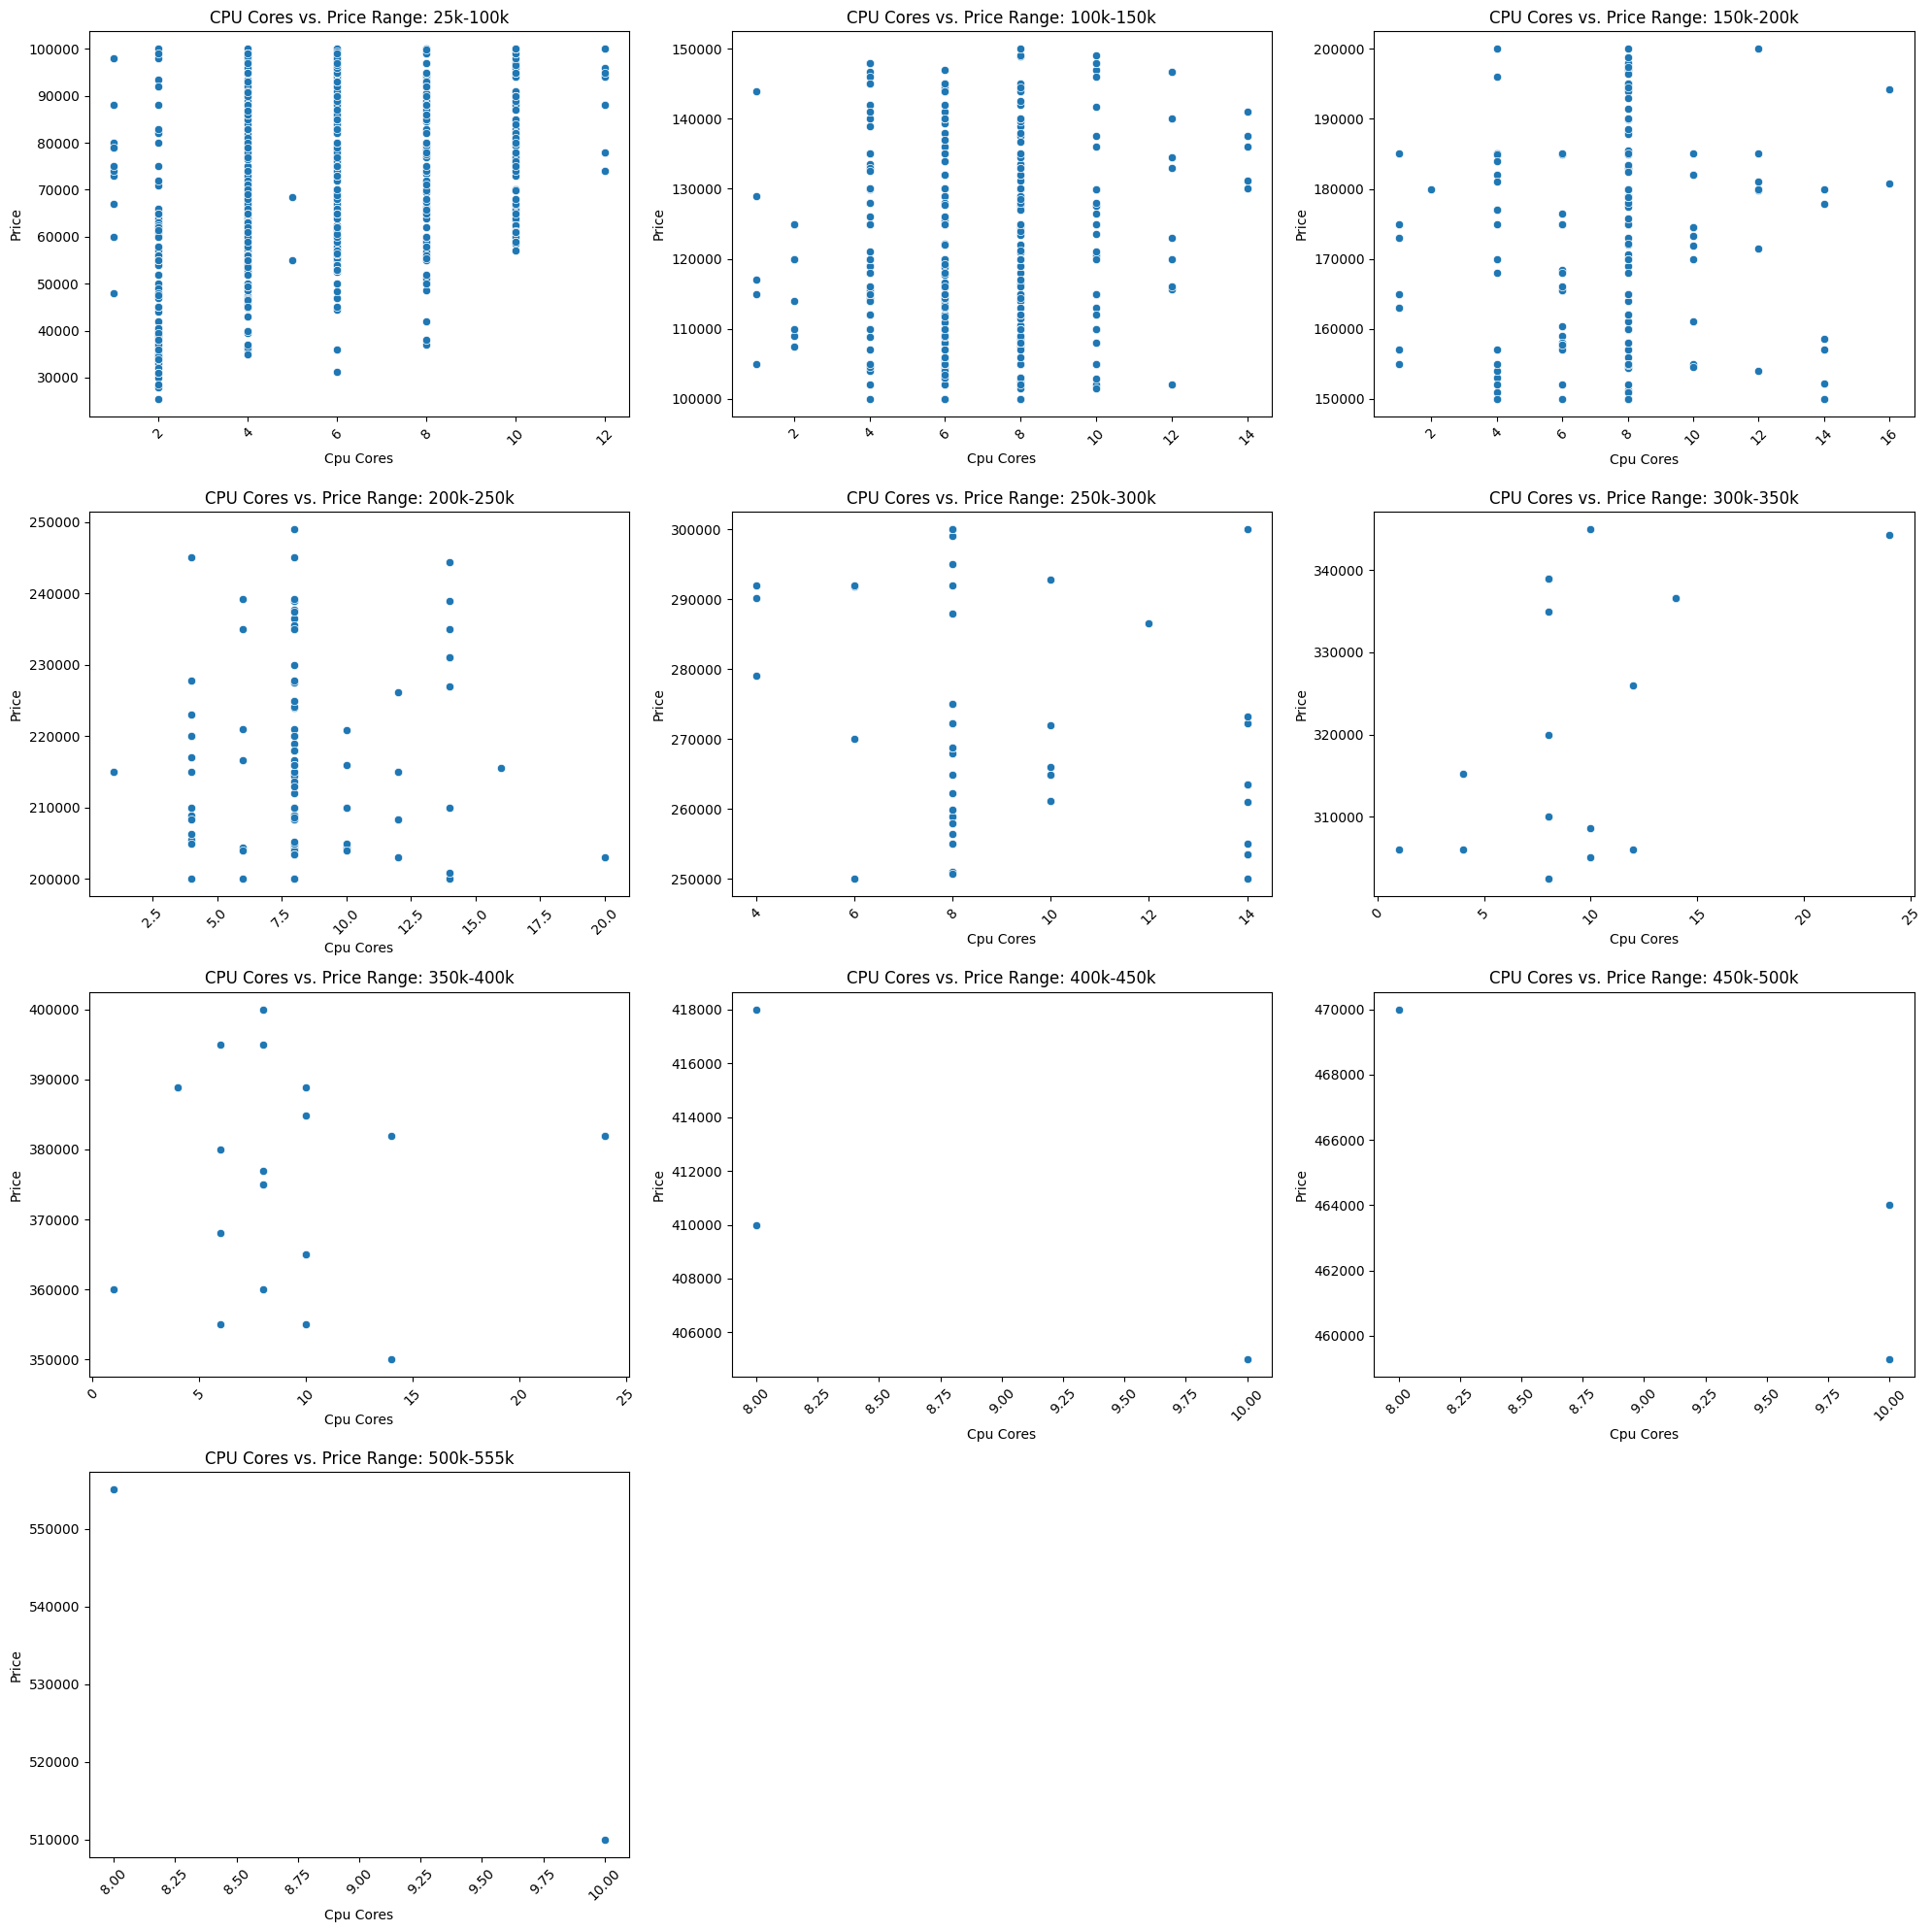

In [37]:
# Number of columns per row
cols_per_row = 3

# Number of rows needed
num_rows = int(np.ceil(num_price_ranges / cols_per_row))

# Create subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(20, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot scatter plots for each price range category
for i, label in enumerate(price_labels):
    subset = laptop[laptop['price_range'] == label]
    if not subset.empty:
        sns.scatterplot(data=subset, x='cpu cores', y='price', ax=axes[i])
        axes[i].set_title(f'CPU Cores vs. Price Range: {label}')
        axes[i].set_xlabel('Cpu Cores')
        axes[i].set_ylabel('Price')
        axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    else:
        fig.delaxes(axes[i])

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

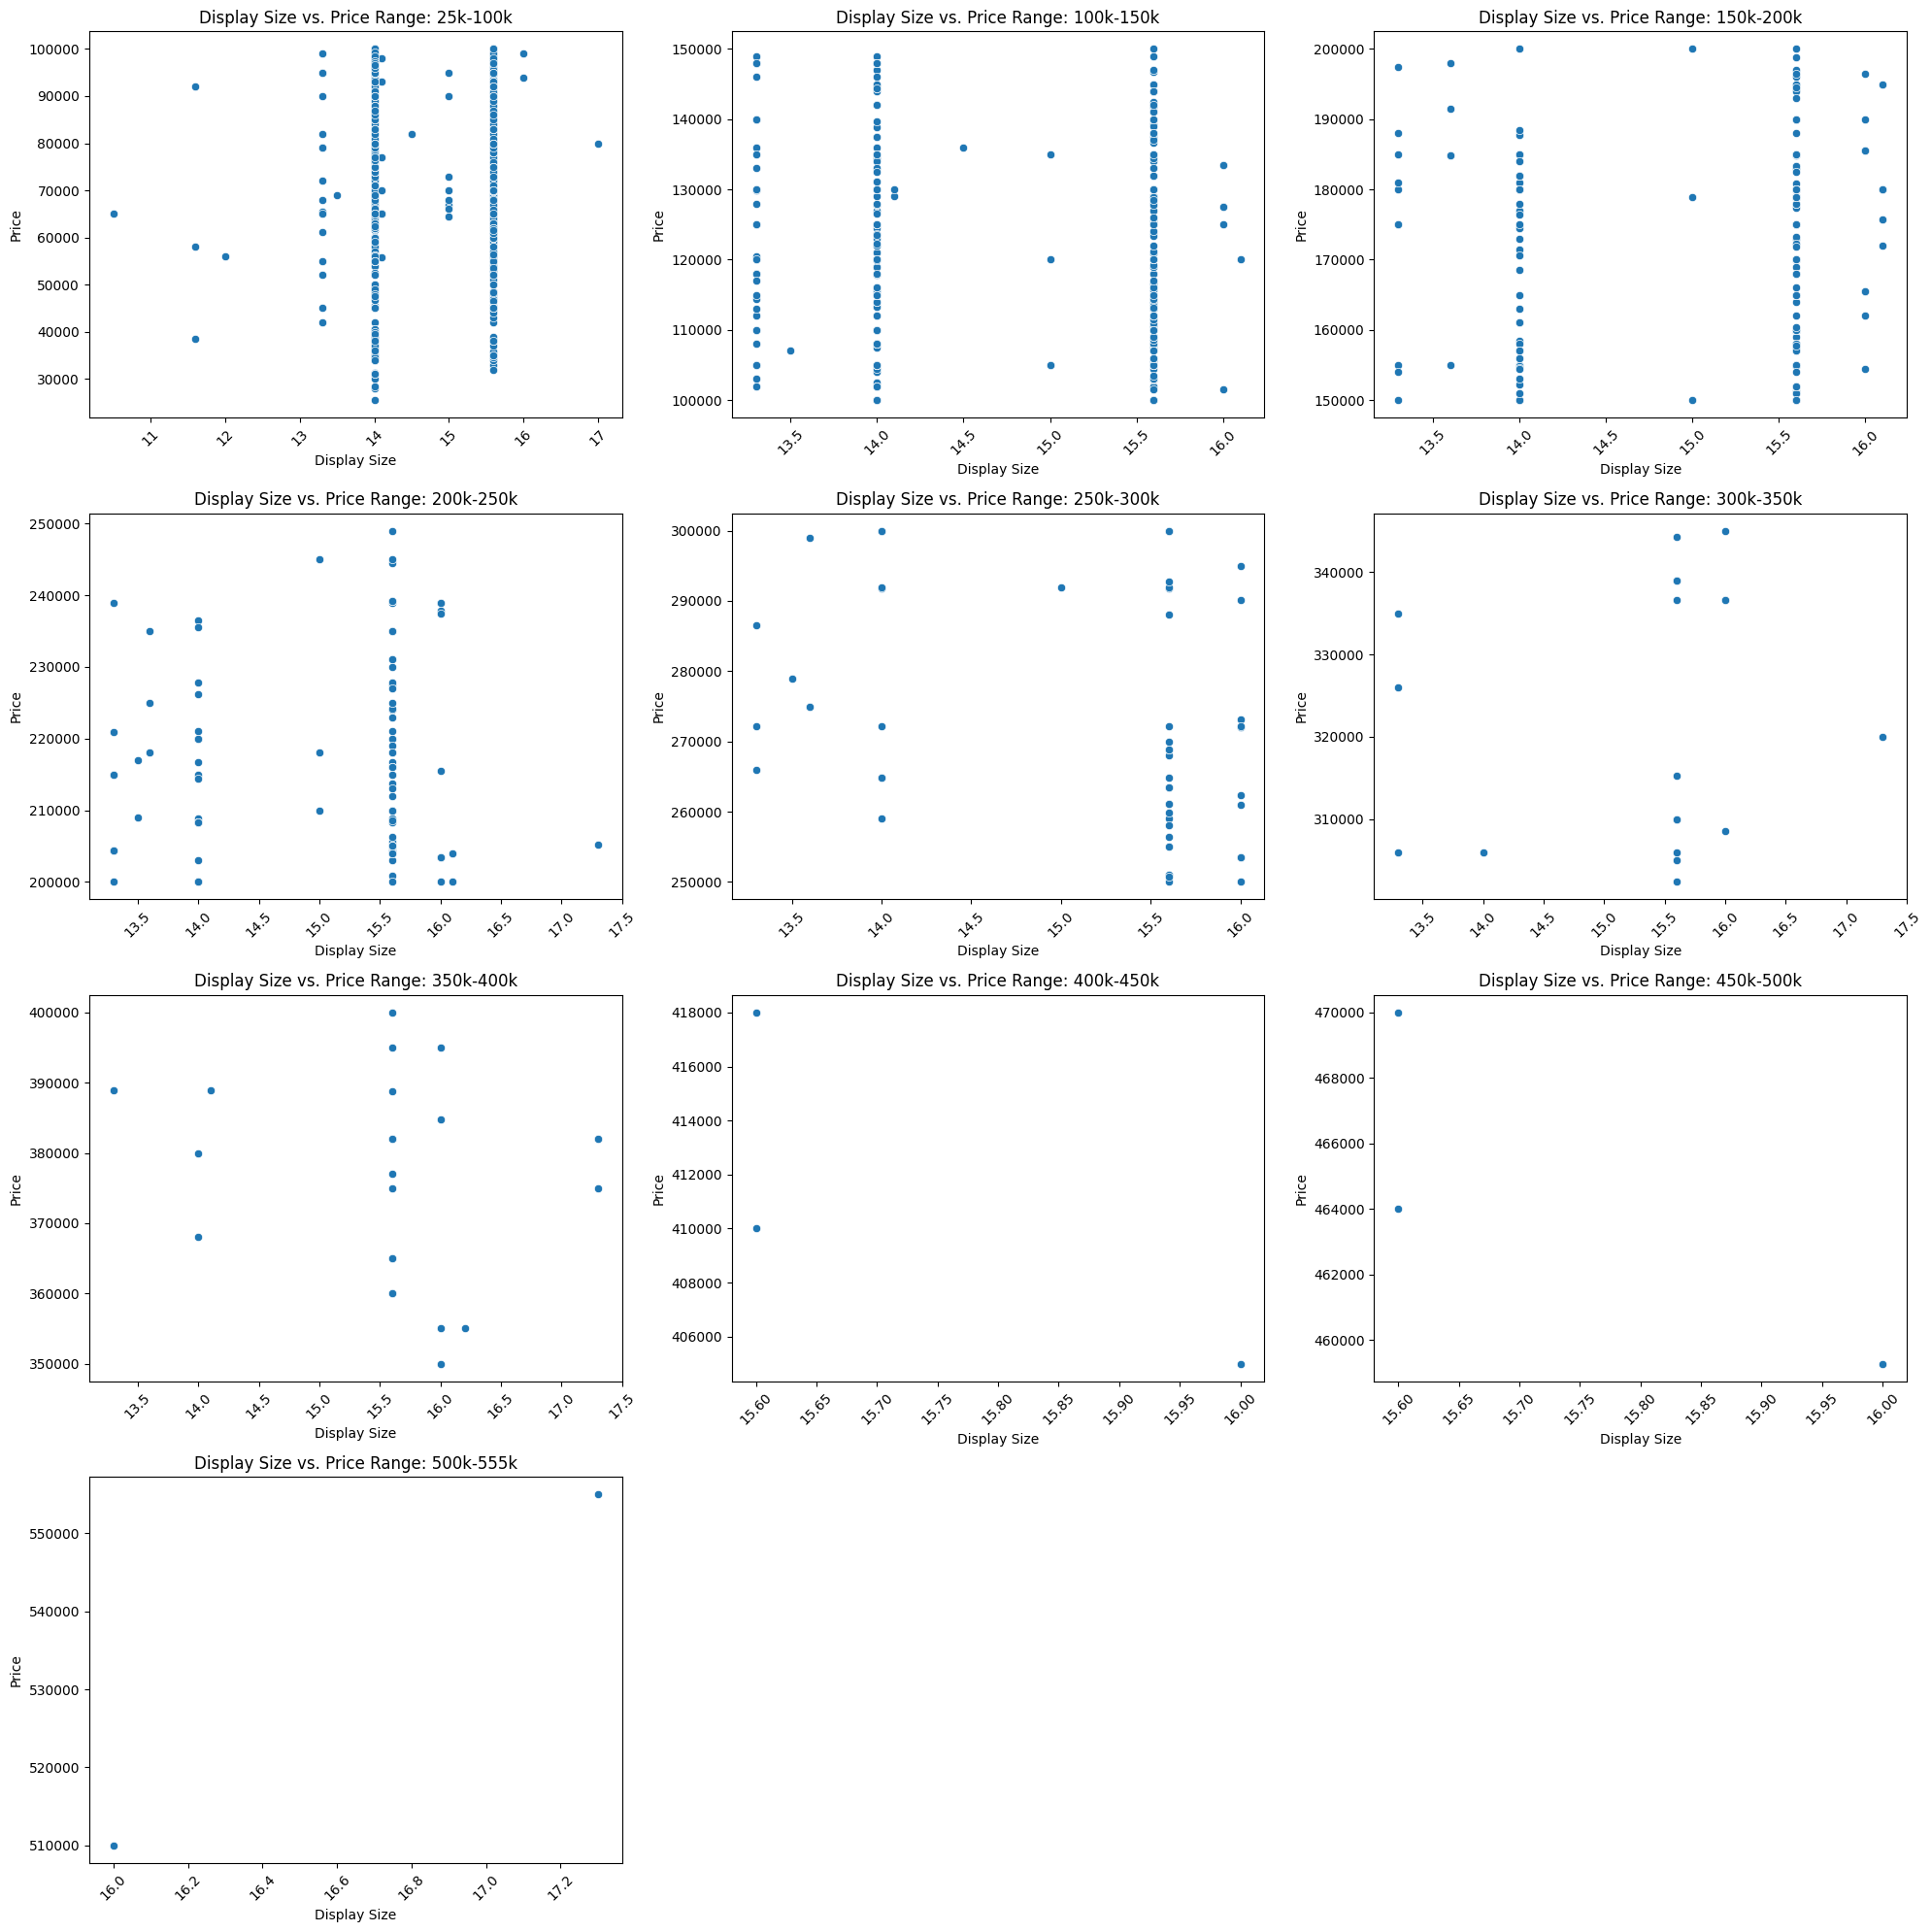

In [38]:
# Number of columns per row
cols_per_row = 3

# Number of rows needed
num_rows = int(np.ceil(num_price_ranges / cols_per_row))

# Create subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(20, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot scatter plots for each price range category
for i, label in enumerate(price_labels):
    subset = laptop[laptop['price_range'] == label]
    if not subset.empty:
        sns.scatterplot(data=subset, x='display size', y='price', ax=axes[i])
        axes[i].set_title(f'Display Size vs. Price Range: {label}')
        axes[i].set_xlabel('Display Size')
        axes[i].set_ylabel('Price')
        axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    else:
        fig.delaxes(axes[i])

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


### 3. What Attribute has the most affect in price?

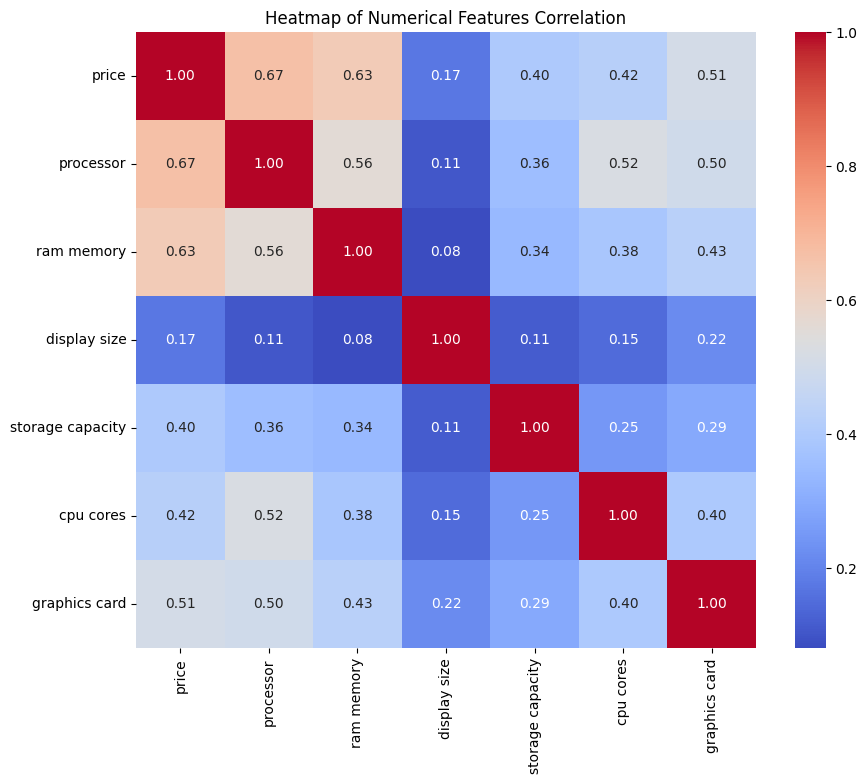

In [39]:
# Heatmap
# Create a DataFrame with only the numerical columns
numerical_data = laptop[cols]

# Calculate the correlation matrix
corr_matrix = numerical_data.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Features Correlation')
plt.show()

### 4. Which brand is the most affordable?

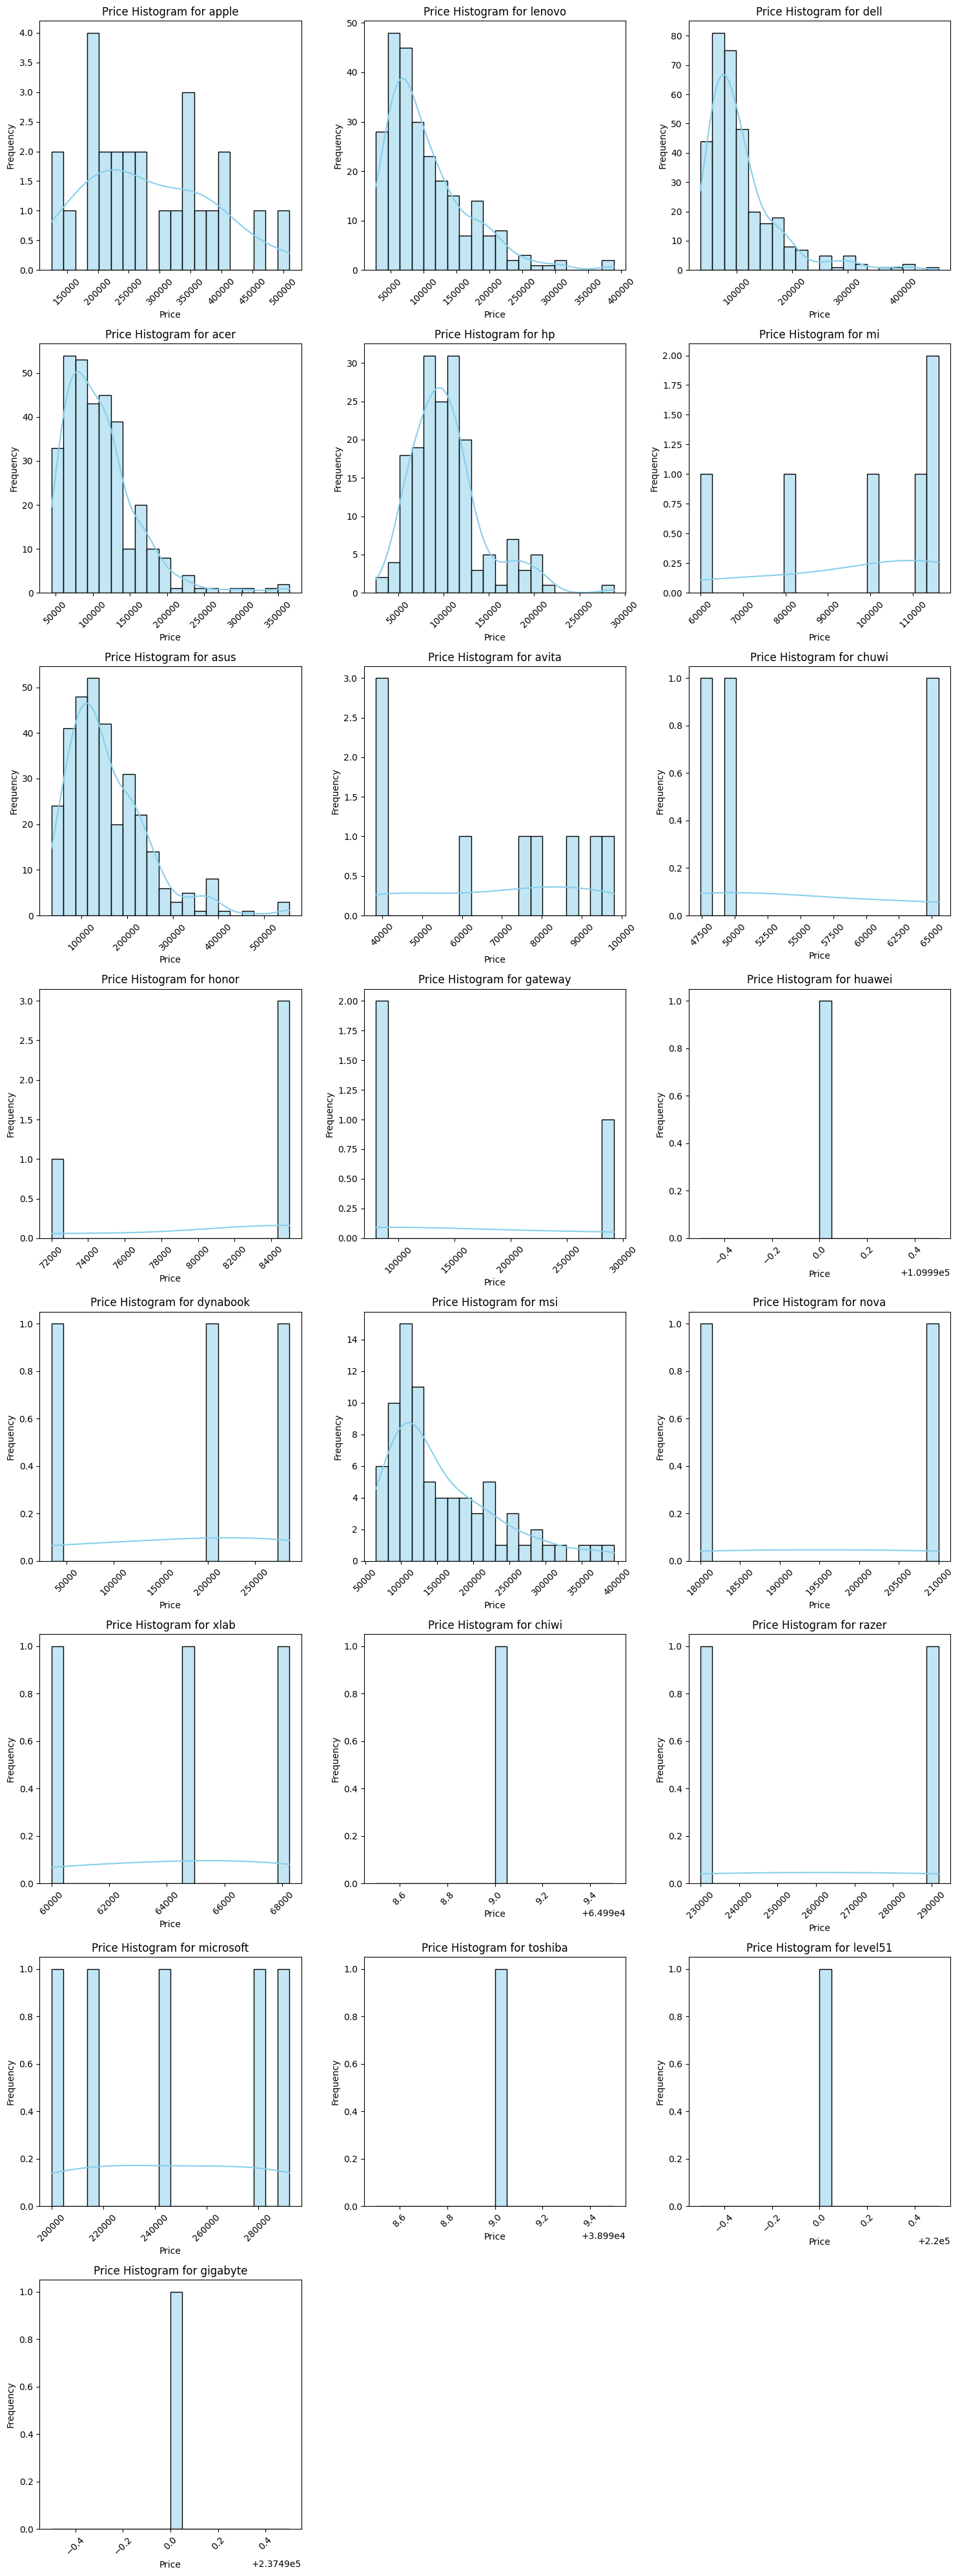

In [41]:
# Separate categories based on brands
brands = laptop['brand'].unique()

# Number of brands
num_brands = len(brands)

# Number of columns per row for subplots
cols_per_row = 3

# Number of rows needed
num_rows = -(-num_brands // cols_per_row)  # Ceiling division

# Create subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot price histograms for each brand
for i, brand in enumerate(brands):
    subset = laptop[laptop['brand'] == brand]
    sns.histplot(data=subset, x='price', ax=axes[i], bins=20, color='skyblue', kde=True)
    axes[i].set_title(f'Price Histogram for {brand}')
    axes[i].set_xlabel('Price')
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(num_brands, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

### 5. Which brand is the best avoided?

c:\Users\acer\Desktop\DS-MiniProject\venv\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\acer\Desktop\DS-MiniProject\venv\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
c:\Users\acer\Desktop\DS-MiniProject\venv\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\acer\Desktop\DS-MiniProject\venv\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
c:\Users\acer\Desktop\DS-MiniProject\venv\lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\acer\Desktop\DS-MiniProject\venv\lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
c:\Users\acer\Desktop\DS-MiniProject\venv\lib\site-packages\seaborn\ma

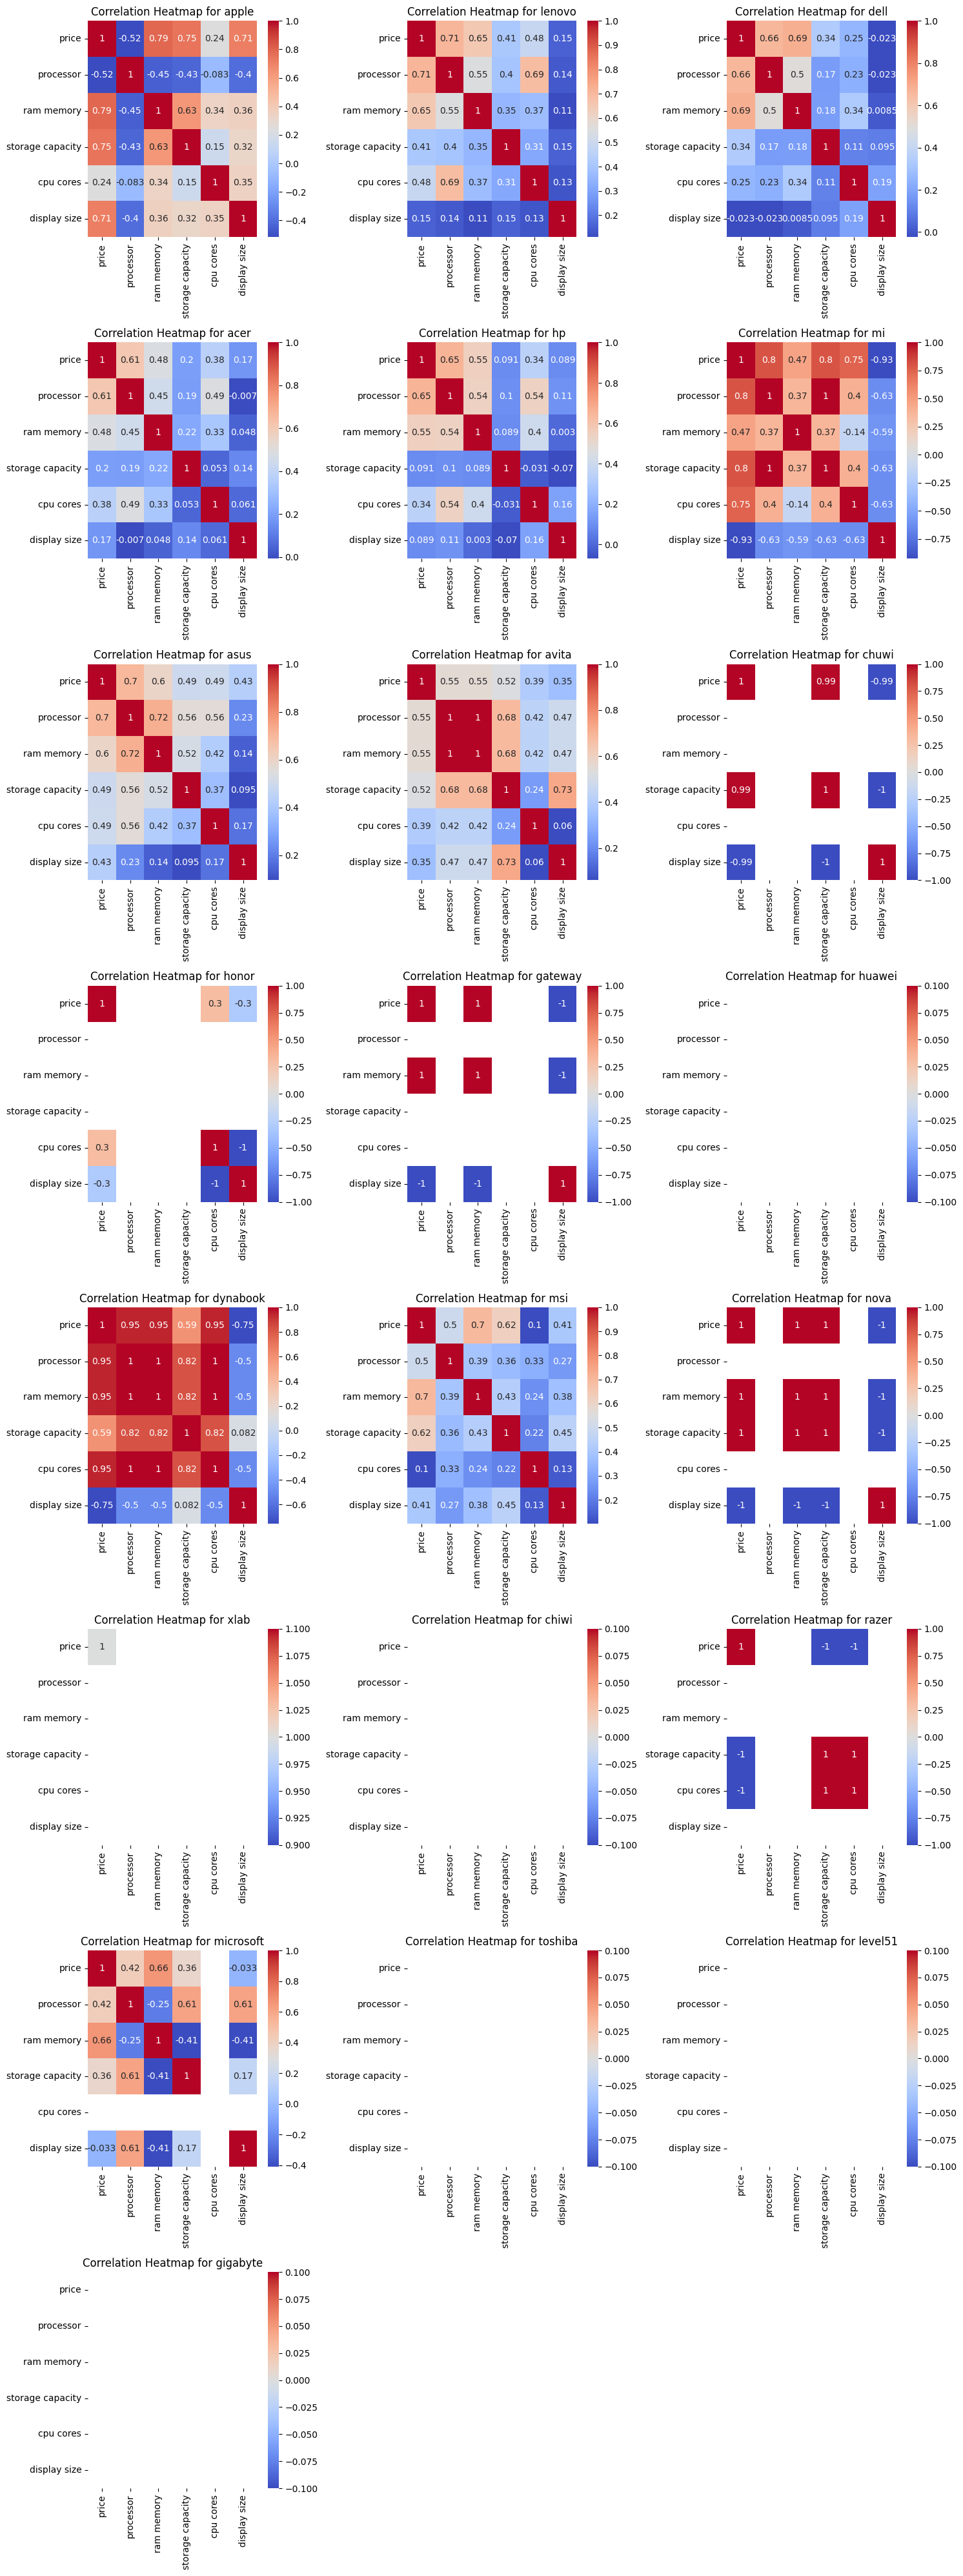

In [44]:
# Specify the numerical columns
numerical_columns = ['price', 'processor', 'ram memory', 'storage capacity', 'cpu cores', 'display size']

# Separate categories based on brands
brands = laptop['brand'].unique()

# Number of brands
num_brands = len(brands)

# Number of columns per row for subplots
cols_per_row = 3

# Number of rows needed
num_rows = -(-num_brands // cols_per_row)  # Ceiling division

# Create subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot correlation heatmap for each brand
for i, brand in enumerate(brands):
    subset = laptop[laptop['brand'] == brand]
    correlation_matrix = subset[numerical_columns].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=axes[i])
    axes[i].set_title(f'Correlation Heatmap for {brand}')

# Remove any unused subplots
for j in range(num_brands, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

### 6. Sales volume prediction and popularity of a laptop model?


### 7. Which combinations of features (e.g., specific processor and RAM combinations) are most commonly found in highly rated laptops?

### 8. After what price range should you ask yourself maybe a laptop is not enough for me?
